## Ejecutar las simulaciones


In [34]:
schedule_names = ['fcfs', 'fcfs-hc', 'fcfs-sa', 'fcfs-sa-opt', 'fcfs-pso', 'sjf', 'sjf-hc', 'sjf-sa', 'sjf-sa-opt', 'sjf-pso', 'easy-backfill', 'easy-backfill-hc', 'easy-backfill-sa', 'easy-backfill-sa-opt', 'easy-backfill-pso']
nombres = ','.join(schedule_names)
output_folder = 'output'
workload = 'workload.json'
platform = 'fat_tree_4.xml'

In [35]:
%%script false --no-raise-error
%%bash -s "$platform" "$workload" "$output_folder" "$nombres"
cd ..
./utils/scripts/run_sim_variables.sh $1 $2 $3 $4

Plataforma: fat_tree_4.xml
Carga de trabajo: workload.json
Directorio de salida: output
Nombres de simulaciones: fcfs fcfs-hc fcfs-sa fcfs-sa-opt fcfs-pso sjf sjf-hc sjf-sa sjf-sa-opt sjf-pso easy-backfill easy-backfill-hc easy-backfill-sa easy-backfill-sa-opt easy-backfill-pso

Simulando: fcfs


time="2023-11-25 19:26:49.143" level=info msg="Waiting for valid context" batsim command="batsim -p platforms/fat_tree_4.xml -w workloads/workload.json -e output/fcfs/fcfs" extracted socket endpoint="tcp://localhost:28000" ready timeout (seconds)=10
time="2023-11-25 19:26:49.145" level=info msg="Starting simulation" batsim cmdfile=output/fcfs/fcfs/cmd/batsim.bash batsim command="batsim -p platforms/fat_tree_4.xml -w workloads/workload.json -e output/fcfs/fcfs" batsim logfile=output/fcfs/fcfs/log/batsim.log scheduler cmdfile=output/fcfs/fcfs/cmd/sched.bash scheduler command="python -m pybatsim --options-file configs/fcfs.json schedulers/AllocOnly_sched.py" scheduler logfile (err)=output/fcfs/fcfs/log/sched.err.log scheduler logfile (out)=output/fcfs/fcfs/log/sched.out.log simulation timeout (seconds)=604800
time="2023-11-25 19:31:07.736" level=info msg="Simulation subprocess succeeded" command="batsim -p platforms/fat_tree_4.xml -w workloads/workload.json -e output/fcfs/fcfs" command fi

## Imports


In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import evalys
from evalys.jobset import JobSet

In [67]:
base_path = os.path.abspath(os.getcwd())
#remove all before the last '/sched-sim'
base_path = base_path[:base_path.rfind('sched-sim')+len('sched-sim')]
base_path

'/home/nk/sched-sim'

# Obteniendo los archivos a analizar


In [68]:
schedule_files = []
jobs_files = []
for folders in os.listdir(f'{base_path}/{output_folder}/'):
    for files in os.listdir(f'{base_path}/{output_folder}/' + folders):
        if files.endswith('_schedule.csv'):
            schedule_files.append(folders + "/" +  files)
        elif files.endswith('_jobs.csv'):
            jobs_files.append(folders + "/" + files)

schedule_files = [os.path.join(f'../{output_folder}', str(file)) for file in sorted(schedule_files)]
jobs_files = [os.path.join(f'../{output_folder}', str(file)) for file in sorted(jobs_files)]
print(schedule_files)
print(jobs_files)

['../output/easy-backfill-hc/easy-backfill-hc_schedule.csv', '../output/easy-backfill-pso/easy-backfill-pso_schedule.csv', '../output/easy-backfill-sa-opt/easy-backfill-sa-opt_schedule.csv', '../output/easy-backfill-sa/easy-backfill-sa_schedule.csv', '../output/easy-backfill/easy-backfill_schedule.csv', '../output/fcfs-hc/fcfs-hc_schedule.csv', '../output/fcfs-pso/fcfs-pso_schedule.csv', '../output/fcfs-sa-opt/fcfs-sa-opt_schedule.csv', '../output/fcfs-sa/fcfs-sa_schedule.csv', '../output/fcfs/fcfs_schedule.csv', '../output/sjf-hc/sjf-hc_schedule.csv', '../output/sjf-pso/sjf-pso_schedule.csv', '../output/sjf-sa-opt/sjf-sa-opt_schedule.csv', '../output/sjf-sa/sjf-sa_schedule.csv', '../output/sjf/sjf_schedule.csv']
['../output/easy-backfill-hc/easy-backfill-hc_jobs.csv', '../output/easy-backfill-pso/easy-backfill-pso_jobs.csv', '../output/easy-backfill-sa-opt/easy-backfill-sa-opt_jobs.csv', '../output/easy-backfill-sa/easy-backfill-sa_jobs.csv', '../output/easy-backfill/easy-backfill_job

In [69]:
metrics = pd.DataFrame()
for file in schedule_files:
    print(file)
    schedule_name = os.path.basename(file).split('_')
    if schedule_name[0] in schedule_names:
        df = pd.read_csv(file)
        df['schedule'] = schedule_name[0]
        metrics = metrics.append(df)
    if schedule_name[1] in schedule_names:
        df = pd.read_csv(file)
        df['schedule'] = schedule_name[1]
        metrics = metrics.append(df)
    print("----")
metrics.set_index('schedule', inplace=True)

../output/easy-backfill-hc/easy-backfill-hc_schedule.csv
----
../output/easy-backfill-pso/easy-backfill-pso_schedule.csv
----
../output/easy-backfill-sa-opt/easy-backfill-sa-opt_schedule.csv
----
../output/easy-backfill-sa/easy-backfill-sa_schedule.csv
----
../output/easy-backfill/easy-backfill_schedule.csv
----
../output/fcfs-hc/fcfs-hc_schedule.csv
----
../output/fcfs-pso/fcfs-pso_schedule.csv
----
../output/fcfs-sa-opt/fcfs-sa-opt_schedule.csv
----
../output/fcfs-sa/fcfs-sa_schedule.csv
----
../output/fcfs/fcfs_schedule.csv
----
../output/sjf-hc/sjf-hc_schedule.csv
----
../output/sjf-pso/sjf-pso_schedule.csv
----
../output/sjf-sa-opt/sjf-sa-opt_schedule.csv
----
../output/sjf-sa/sjf-sa_schedule.csv
----
../output/sjf/sjf_schedule.csv
----


In [70]:
jobsets = {}
for file in jobs_files:
    schedule_name = os.path.basename(file).split('_')
    if schedule_name[0] in schedule_names:
        print(f"{schedule_name[0]}")
        print("reading", file)
        jobsets[schedule_name[0]] = JobSet.from_csv(file)

easy-backfill-hc
reading ../output/easy-backfill-hc/easy-backfill-hc_jobs.csv
easy-backfill-pso
reading ../output/easy-backfill-pso/easy-backfill-pso_jobs.csv
easy-backfill-sa-opt
reading ../output/easy-backfill-sa-opt/easy-backfill-sa-opt_jobs.csv
easy-backfill-sa
reading ../output/easy-backfill-sa/easy-backfill-sa_jobs.csv
easy-backfill
reading ../output/easy-backfill/easy-backfill_jobs.csv
fcfs-hc
reading ../output/fcfs-hc/fcfs-hc_jobs.csv
fcfs-pso
reading ../output/fcfs-pso/fcfs-pso_jobs.csv
fcfs-sa-opt
reading ../output/fcfs-sa-opt/fcfs-sa-opt_jobs.csv
fcfs-sa
reading ../output/fcfs-sa/fcfs-sa_jobs.csv
fcfs
reading ../output/fcfs/fcfs_jobs.csv
sjf-hc
reading ../output/sjf-hc/sjf-hc_jobs.csv
sjf-pso
reading ../output/sjf-pso/sjf-pso_jobs.csv
sjf-sa-opt
reading ../output/sjf-sa-opt/sjf-sa-opt_jobs.csv
sjf-sa
reading ../output/sjf-sa/sjf-sa_jobs.csv
sjf
reading ../output/sjf/sjf_jobs.csv


In [71]:
def calculate_compute_utilisation(schedule):
    compute_time = jobsets[schedule].df[['execution_time', 'requested_number_of_resources']].apply(lambda row: row.execution_time * row.requested_number_of_resources, axis=1).sum()
    return compute_time / (metrics.loc[schedule].makespan * 96)

def calculate_storage_utilisation(schedule):
    storage_time = jobsets[schedule].df[['execution_time', 'metadata']].apply(lambda row: row.execution_time * row.metadata, axis=1).sum()
    burst_buffer_capacity = 5 * 10**9
    num_burst_buffers = 12
    total_storage_time = metrics.loc[schedule].makespan * num_burst_buffers * burst_buffer_capacity
    return storage_time / total_storage_time

def create_metric_df(metric):
    return pd.concat([jobsets[schedule].df[metric].rename(schedule) for schedule in schedule_names], axis=1)

In [72]:
def bounded_slowdown(df):
    return (df.turnaround_time / df.execution_time.clip(lower=60)).clip(lower=1)

def create_all_metrics_df():
    dfs = []
    for schedule in schedule_names:
        df = jobsets[schedule].df
        df = df.assign(schedule=schedule).assign(bounded_slowdown=bounded_slowdown(df))[['schedule', 'waiting_time', 'turnaround_time', 'stretch']]
        dfs.append(df)
    df = pd.concat(dfs, axis=0).rename({'stretch': 'slowdown'}, axis=1)
    return df

In [73]:
metrics['compute_utilisation'] = pd.Series({schedule: calculate_compute_utilisation(schedule) for schedule in schedule_names})

In [74]:
metrics = metrics.reindex(schedule_names)
metrics.index.rename(None, inplace=True)
# sns.set_theme(context='talk', style='whitegrid')
sns.set_theme(style='whitegrid')

In [75]:
metrics.T

,fcfs,fcfs-hc,fcfs-sa,fcfs-sa-opt,fcfs-pso,sjf,sjf-hc,sjf-sa,sjf-sa-opt,sjf-pso,easy-backfill,easy-backfill-hc,easy-backfill-sa,easy-backfill-sa-opt,easy-backfill-pso
batsim_version,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0
consumed_joules,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
makespan,260983,260746,260999,261266,260999,260978,260816,261228,260999,261043,260978,260978,260999,260999,260978
max_slowdown,86918.5,33458.1,45907.3,47912.7,22854.8,44952,94338.7,39060,34579.4,60847.4,35518.6,20549.7,41436.7,20549.7,23505.6
max_turnaround_time,15998.5,17999.8,17669.3,19543.1,21037.6,17691.3,18115.6,21655.4,18970,20779.1,15978.7,16839.3,18709.5,16231.8,20040.8
max_waiting_time,15994.6,17996,17647.2,19532.5,21028.8,17674.4,18107.2,21436.8,18362.8,20741.5,15974.8,16831.4,18490.9,16223.9,20038.9
mean_slowdown,374.013,371.598,339.654,347.799,318.118,351.068,404.279,336.977,341.437,381.585,210.663,185.912,191.998,185.63,197.203
mean_turnaround_time,1965.75,1977.71,1858.99,1955.88,1831.72,1890.17,1968.52,1852.25,1794.7,1916.76,1137.71,1155.89,1119.44,1128.42,1120.57
mean_waiting_time,1833.26,1845.47,1726.12,1822.59,1699.83,1758.47,1836.34,1720,1663.03,1784.46,1006.26,1023.91,987.46,996.286,988.692
nb_computing_machines,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


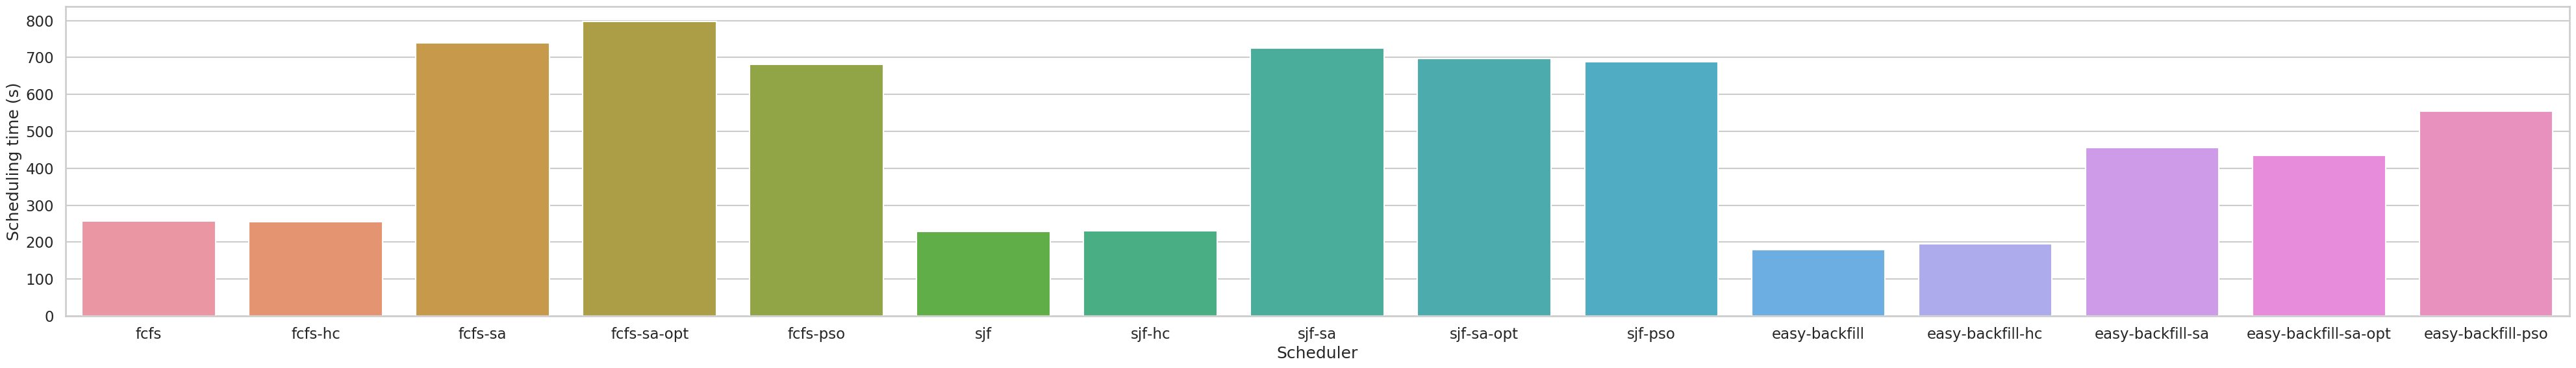

In [77]:
# Scheduling time
sns.set_theme(style='whitegrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(40, 6))
sns.barplot(x=metrics.index, y=metrics.scheduling_time, ax=ax)
ax.set_ylabel('Scheduling time (s)')
ax.set_xlabel('Scheduler')
fig.tight_layout()
fig.savefig('scheduling_time.pdf', bbox_inches='tight')

In [78]:
# Scheduling time comparison table using pandas
metrics.scheduling_time.to_frame().T

,fcfs,fcfs-hc,fcfs-sa,fcfs-sa-opt,fcfs-pso,sjf,sjf-hc,sjf-sa,sjf-sa-opt,sjf-pso,easy-backfill,easy-backfill-hc,easy-backfill-sa,easy-backfill-sa-opt,easy-backfill-pso
scheduling_time,257.368731,254.791867,738.892317,798.017759,680.918344,229.283148,231.189395,724.738857,696.925146,689.08391,178.942618,195.835077,456.009545,435.554668,555.25235


In [79]:
import numpy as np
# Scheduling time comparison table using pandas. % performacnce vs others
sched_time = metrics.scheduling_time.to_frame()

# Initialize a matrix to hold the percentage improvement values
improvement_matrix = pd.DataFrame(index=sched_time.index, columns=sched_time.index)

# Calculate percentage improvement for each pair of algorithms
for i in sched_time.index:
    for j in sched_time.index:
        if i != j:
            # Percentage improvement is calculated as: (Value of j - Value of i) / Value of j * 100
            improvement_matrix.loc[i, j] = (sched_time.loc[j, 'scheduling_time'] - sched_time.loc[i, 'scheduling_time']) / sched_time.loc[j, 'scheduling_time'] * 100
        else:
            # No improvement over itself, set to NaN
            improvement_matrix.loc[i, j] = np.nan

improvement_matrix.fillna(0, inplace=True)  # Replacing NaN with 0 for no improvement
improvement_matrix

,fcfs,fcfs-hc,fcfs-sa,fcfs-sa-opt,fcfs-pso,sjf,sjf-hc,sjf-sa,sjf-sa-opt,sjf-pso,easy-backfill,easy-backfill-hc,easy-backfill-sa,easy-backfill-sa-opt,easy-backfill-pso
fcfs,0.000000,-1.011360,65.168303,67.748997,62.202703,-12.249301,-11.323762,64.488073,63.070822,62.650596,-43.827521,-31.421161,43.560670,40.910120,53.648331
fcfs-hc,1.001234,0.000000,65.517050,68.071905,62.581142,-11.125423,-10.209150,64.843631,63.440569,63.024551,-42.387470,-30.105327,44.125760,41.501748,54.112420
fcfs-sa,-187.094829,-189.998392,0.000000,7.409038,-8.514086,-222.261938,-219.604763,-1.952905,-6.021762,-7.228206,-312.921374,-277.303356,-62.034397,-69.643990,-33.073244
fcfs-sa-opt,-210.067877,-213.203780,-8.001902,0.000000,-17.197277,-248.049024,-245.179224,-10.111077,-14.505520,-15.808503,-345.962939,-307.494802,-75.000231,-83.218736,-43.721636
fcfs-pso,-164.569181,-167.244929,7.846065,14.673786,0.000000,-196.977057,-194.528365,6.046387,2.296775,1.184989,-280.523294,-247.699888,-49.321073,-56.333612,-22.632231
sjf,10.912586,10.011591,68.969342,71.268415,66.327365,0.000000,0.824539,68.363343,67.100750,66.726382,-28.132219,-17.079714,49.719660,47.358354,58.706497
sjf-hc,10.171918,9.263432,68.711355,71.029543,66.047413,-0.831394,0.000000,68.100317,66.827227,66.449747,-29.197503,-18.053108,49.301632,46.920694,58.363185
sjf-sa,-181.595536,-184.443481,1.915497,9.182615,-6.435502,-216.089021,-213.482743,0.000000,-3.990918,-5.174253,-305.011878,-270.076121,-58.930633,-66.394464,-30.524230
sjf-sa-opt,-170.788585,-173.527234,5.679741,12.667965,-2.350767,-203.958294,-201.452039,3.837756,0.000000,-1.137922,-289.468509,-255.873502,-52.831263,-60.008650,-25.515029
sjf-pso,-167.741892,-170.449728,6.740956,13.650554,-1.199199,-200.538402,-198.060346,4.919696,1.125119,0.000000,-285.086525,-251.869502,-51.111729,-58.208363,-24.102835


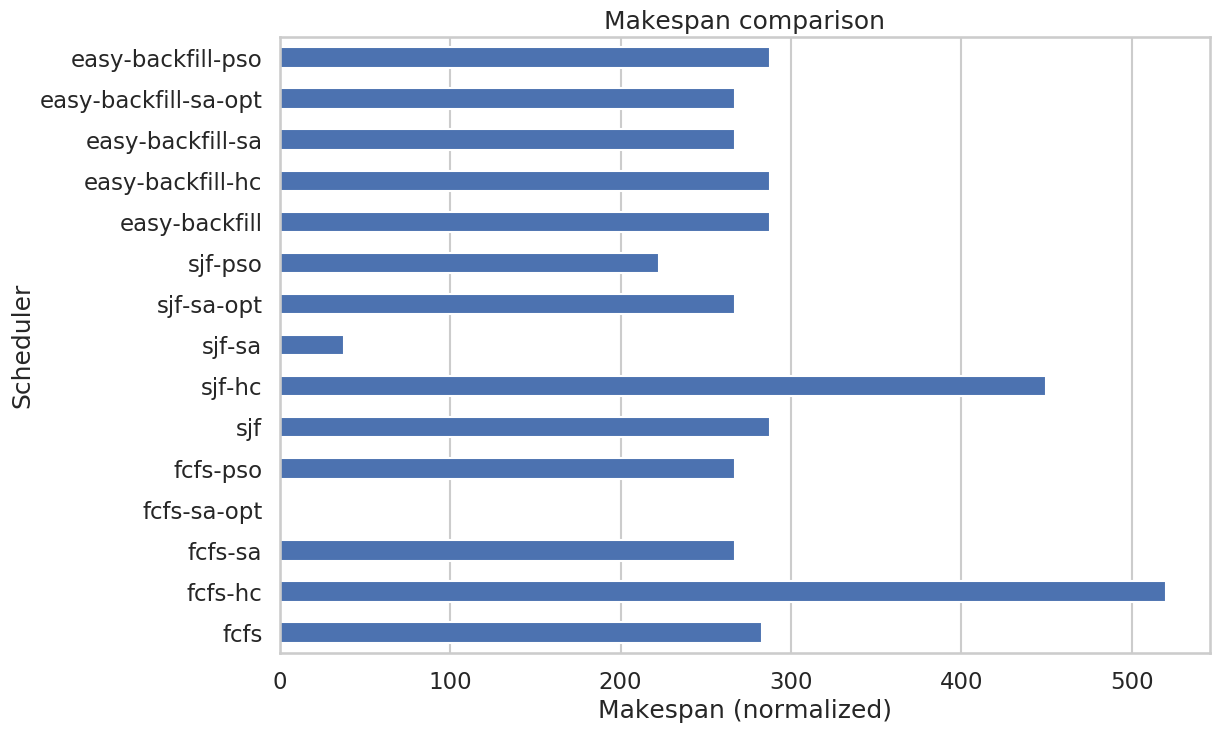

In [80]:
df_metrics = metrics.copy()
df_metrics['makespan'] = abs(df_metrics['makespan'] - df_metrics['makespan'].max())

ax = df_metrics['makespan'].plot.barh(figsize=(12, 8))
ax.set_xlabel('Makespan (normalized)')
ax.set_ylabel('Scheduler')
ax.set_title('Makespan comparison') 
ax.grid(axis='y')

In [81]:
metrics_df = create_all_metrics_df()
metrics_df

,schedule,waiting_time,turnaround_time,slowdown
0,fcfs,0.001200,9.748482,1.000123
1,fcfs,9.750132,47.498863,1.258290
2,fcfs,47.500513,50.275529,18.117203
3,fcfs,50.277179,59.422258,6.497731
4,fcfs,9.750732,321.338273,1.031294
...,...,...,...,...
2445,easy-backfill-pso,1786.257472,2440.639895,3.729684
2446,easy-backfill-pso,2440.641545,2442.517079,1302.304643
2447,easy-backfill-pso,2442.518729,2451.232055,281.319921
2448,easy-backfill-pso,2451.233705,2460.541855,264.342743


# Waiting Time


In [82]:
waiting_times = create_metric_df('waiting_time')
waiting_times.describe()

,fcfs,fcfs-hc,fcfs-sa,fcfs-sa-opt,fcfs-pso,sjf,sjf-hc,sjf-sa,sjf-sa-opt,sjf-pso,easy-backfill,easy-backfill-hc,easy-backfill-sa,easy-backfill-sa-opt,easy-backfill-pso
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,1833.255345,1845.466869,1726.123071,1822.593316,1699.832042,1758.474131,1836.344131,1720.004723,1663.028080,1784.456600,1006.259567,1023.908180,987.459709,996.286227,988.691958
std,2470.035601,2641.628967,2479.922599,2633.747595,2579.139266,2570.600780,2772.906639,2580.458655,2371.358385,2721.723972,1672.036803,1714.048309,1693.440529,1678.388284,1740.844205
min,0.001200,0.001200,0.001200,0.001200,0.001200,0.001200,0.001200,0.001200,0.001200,0.001200,0.001200,0.001200,0.001200,0.001200,0.001200
25%,185.566254,115.787739,109.631524,140.946884,107.567545,84.743012,115.780355,85.082019,91.501074,109.444135,30.329454,29.863259,29.585292,30.983159,30.194825
50%,1006.715089,914.496877,862.865939,900.071475,825.927799,833.212515,862.377164,780.660380,809.475732,850.968453,390.293443,399.429927,410.323559,403.773663,366.443183
75%,2379.269202,2299.103411,2287.608806,2310.776854,2237.597653,2331.573592,2220.835742,2170.228617,2172.514509,2242.348527,1256.031159,1254.127706,1228.769482,1226.583254,1205.322185
max,15994.639060,17995.955580,17647.175802,19532.498657,21028.819022,17674.413966,18107.246557,21436.795849,18362.778466,20741.489592,15974.783483,16831.395694,18490.874333,16223.897321,20038.877149


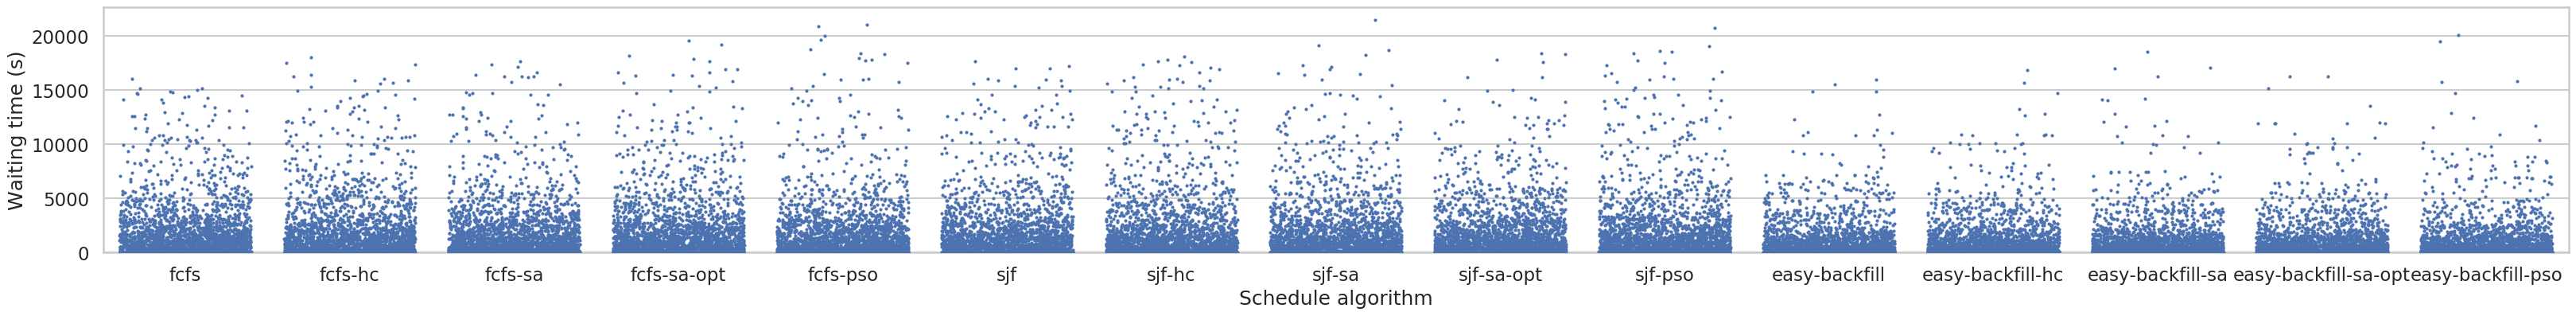

In [83]:
largest = pd.concat([metrics_df[metrics_df.schedule == schedule][['schedule', 'waiting_time']].nlargest(n=4000, columns='waiting_time') for schedule in schedule_names])
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(40,4))
    sns.stripplot(data=largest, x='schedule', y='waiting_time', ax=ax, size=3, jitter=0.4)
    ax.set_ylim(0)
    ax.set_ylabel('Waiting time (s)')
    ax.set_xlabel('Schedule algorithm')
fig.savefig('results/waiting-time_dist.pdf', bbox_inches='tight')

Text(0.5, 0, 'Schedule algorithm')

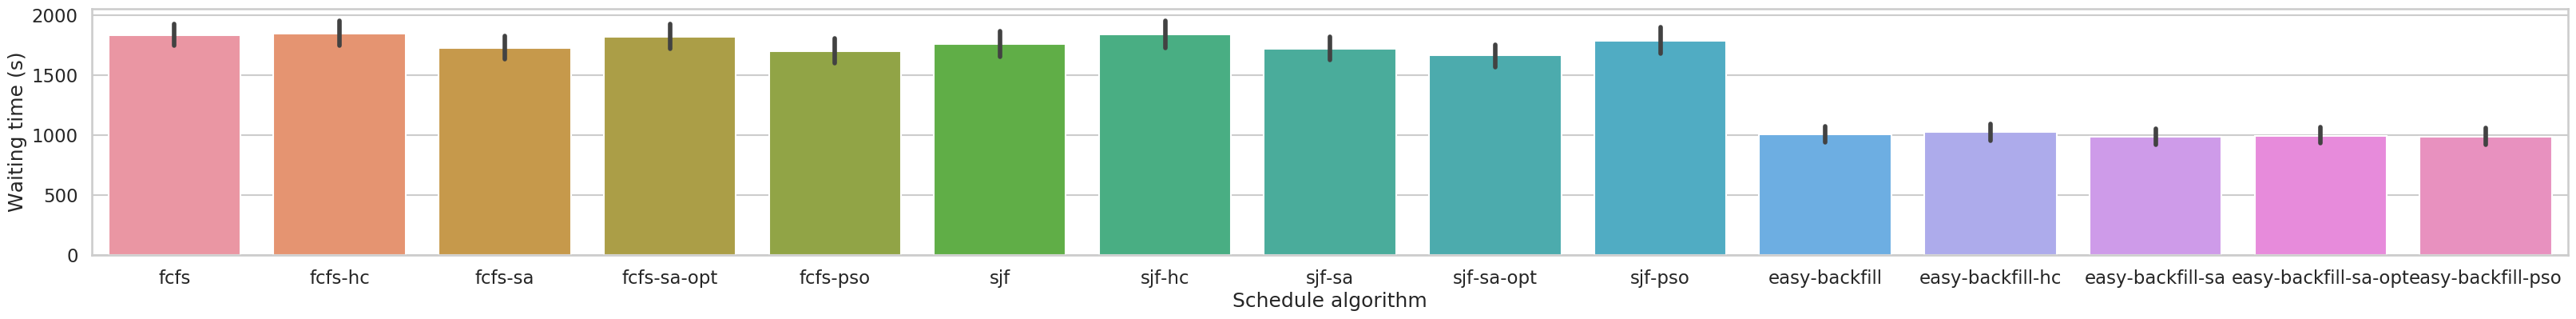

In [87]:
fig, ax = plt.subplots(figsize=(40,4))
sns.barplot(data=waiting_times, ax=ax)
ax.set_ylabel('Waiting time (s)')
ax.set_xlabel('Schedule algorithm')
#fig.savefig('results/waiting-time_mean.pdf', bbox_inches='tight')

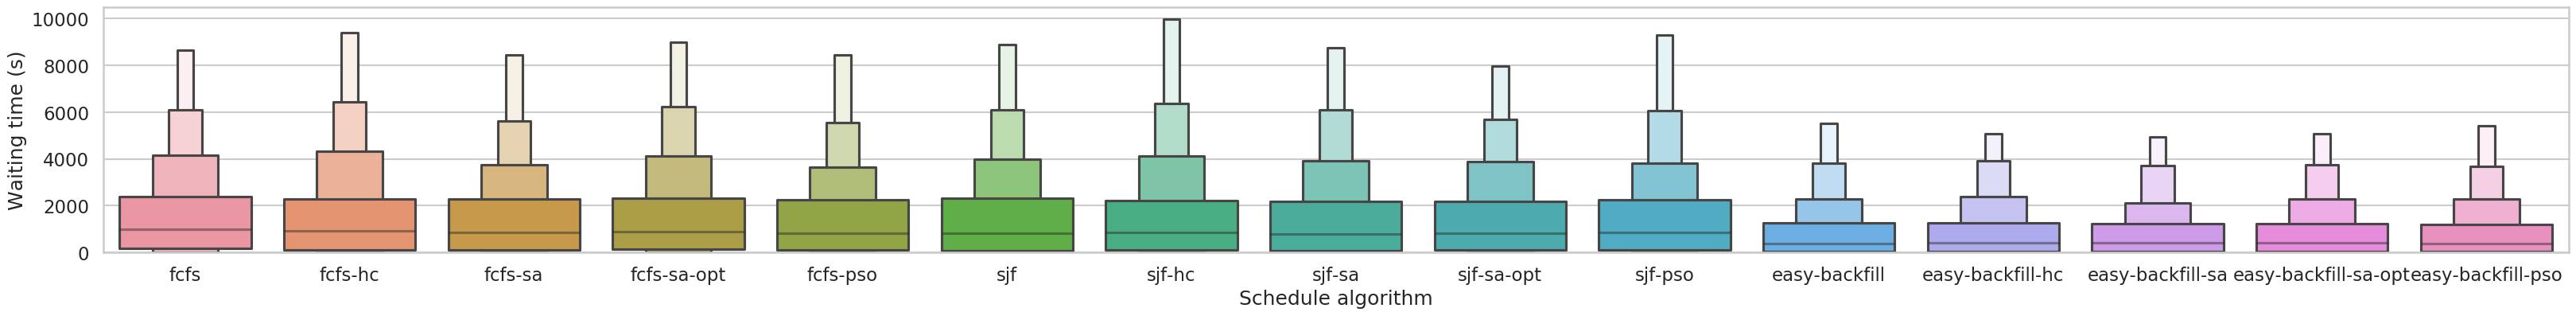

In [86]:
fig, ax = plt.subplots(figsize=(40,4))
sns.boxenplot(data=waiting_times, k_depth=4, showfliers=False, ax=ax)
ax.set_ylim(0)
# ax.set_ylim(top=140000)
ax.set_ylabel('Waiting time (s)')
ax.set_xlabel('Schedule algorithm')
fig.savefig('results/waiting-time_boxen.pdf', bbox_inches='tight')

In [55]:
# improve between 2 algorithms, just % in mean of 2 algorithms as input. Example fcfs vs sjf
waiting_times_copy = waiting_times.copy()
improve = -(1 - (waiting_times_copy['sjf'] / waiting_times_copy['fcfs'])) * 100

# Verificar si hay valores infinitos o muy grandes y calcular la media
is_infinite = improve == float('inf')
mean_improve = improve[~is_infinite].mean()

mean_improve, is_infinite.any()

(446052.0505755229, False)

# Turnarround Time


In [88]:
turnaround_times = create_metric_df('turnaround_time')
turnaround_times.describe()

,fcfs,fcfs-hc,fcfs-sa,fcfs-sa-opt,fcfs-pso,sjf,sjf-hc,sjf-sa,sjf-sa-opt,sjf-pso,easy-backfill,easy-backfill-hc,easy-backfill-sa,easy-backfill-sa-opt,easy-backfill-pso
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,1965.753439,1977.712514,1858.986200,1955.880837,1831.723986,1890.170531,1968.517189,1852.248224,1794.703965,1916.760948,1137.711879,1155.891446,1119.439278,1128.415247,1120.568914
std,2489.014141,2661.654861,2501.597634,2657.926261,2599.273219,2590.496718,2790.615070,2602.973099,2394.779862,2739.830395,1727.575574,1769.694707,1748.467605,1735.021362,1796.098571
min,0.241091,0.171429,0.171429,0.309460,0.171429,0.170829,0.171429,0.309460,0.171429,0.241091,0.219123,0.219123,0.171429,0.171429,0.219123
25%,352.677701,271.250311,256.697398,277.302334,222.776294,203.422956,241.923666,204.805830,217.304714,238.839250,65.374761,69.447273,67.819889,69.120774,69.627365
50%,1134.456167,1059.967746,1008.244654,1045.036373,987.939943,1006.071911,1013.035302,972.237590,984.685712,1000.724326,505.176882,508.405690,526.203661,511.383972,504.079190
75%,2593.140905,2490.763592,2480.534766,2460.677790,2394.788624,2486.488655,2391.567960,2360.038053,2405.321731,2399.721570,1477.541565,1477.125653,1425.196876,1396.393751,1354.708957
max,15998.531278,17999.847798,17669.328801,19543.078137,21037.598312,17691.268259,18115.578260,21655.421697,18970.041089,20779.130155,15978.675701,16839.269304,18709.500181,16231.770931,20040.754268


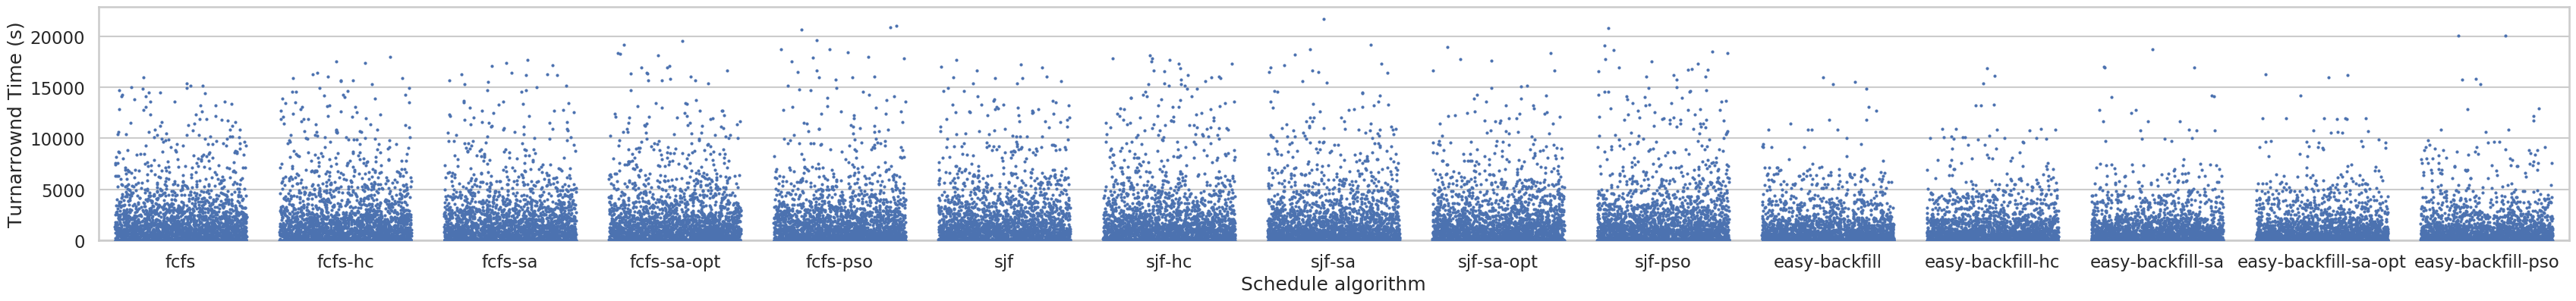

In [89]:
largest = pd.concat([metrics_df[metrics_df.schedule == schedule][['schedule', 'turnaround_time']].nlargest(n=4000, columns='turnaround_time') for schedule in schedule_names])
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(42,4))
    sns.stripplot(data=largest, x='schedule', y='turnaround_time', ax=ax, size=3, jitter=0.4)
    ax.set_ylim(0)
#     ax.set_ylim(top=2.5*10**6)

    ax.set_ylabel('Turnarrownd Time (s)')
    ax.set_xlabel('Schedule algorithm')
fig.savefig('results/turnaround-time_dist.pdf', bbox_inches='tight')

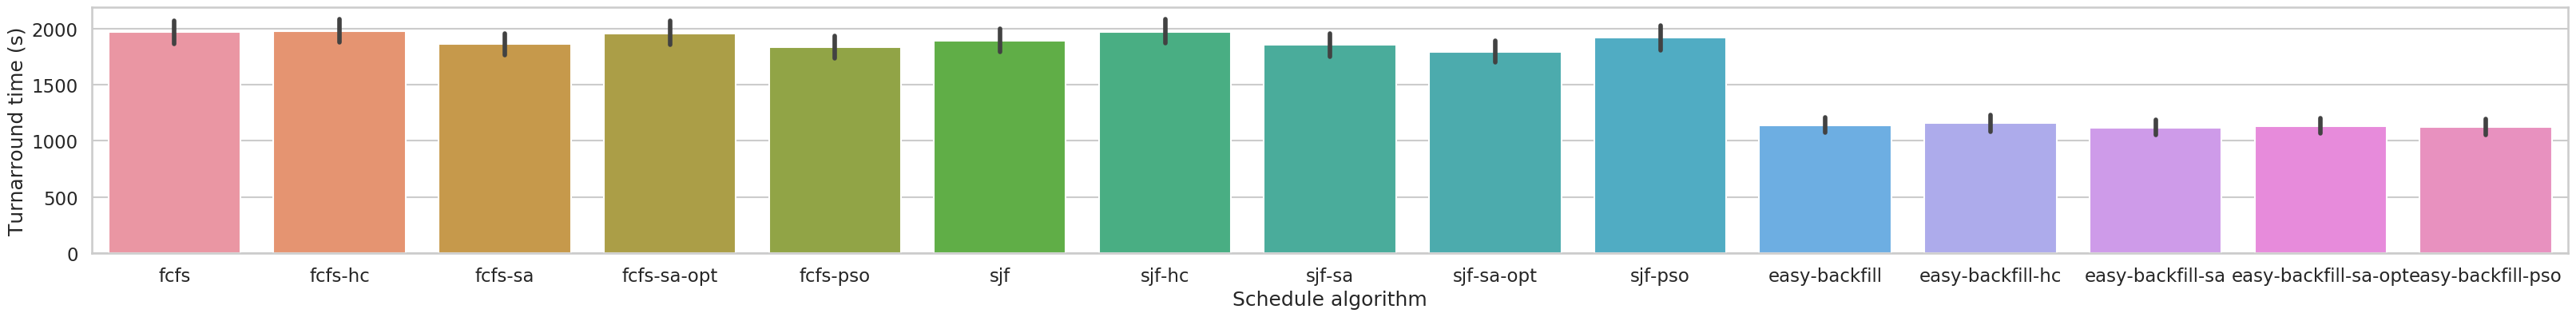

In [91]:
fig, ax = plt.subplots(figsize=(40,4))
sns.barplot(data=turnaround_times, ax=ax)
ax.set_ylabel('Turnarround time (s)')
ax.set_xlabel('Schedule algorithm')
fig.savefig('results/turnaround-time_mean.pdf', bbox_inches='tight')

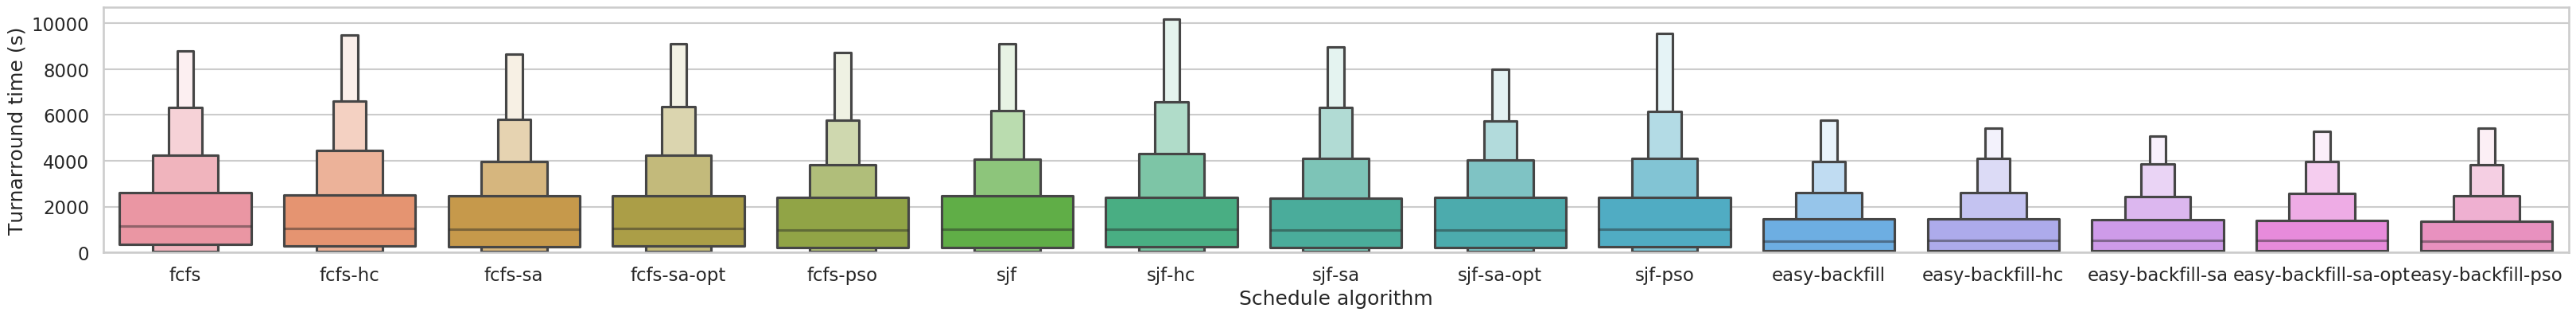

In [92]:
fig, ax = plt.subplots(figsize=(40,4))
sns.boxenplot(data=turnaround_times, k_depth=4, showfliers=False, ax=ax)
ax.set_ylim(0)
# ax.set_ylim(top=140000)
ax.set_ylabel('Turnarround time (s)')
ax.set_xlabel('Schedule algorithm')
fig.savefig('results/turnaround-time_boxen.pdf', bbox_inches='tight')

# Slowdown


In [93]:
slowdown = create_metric_df('stretch')
slowdown.describe()

,fcfs,fcfs-hc,fcfs-sa,fcfs-sa-opt,fcfs-pso,sjf,sjf-hc,sjf-sa,sjf-sa-opt,sjf-pso,easy-backfill,easy-backfill-hc,easy-backfill-sa,easy-backfill-sa-opt,easy-backfill-pso
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,374.013437,371.598233,339.654076,347.798782,318.117956,351.067650,404.278671,336.977162,341.437218,381.585133,210.662566,185.912334,191.998229,185.630391,197.202625
std,2156.102791,1528.576209,1596.332846,1516.433341,1224.940704,1692.480402,2501.478149,1495.466534,1538.150106,1868.874595,1266.556848,945.640350,1206.264103,883.543996,1083.415198
min,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002
25%,3.909103,3.454772,3.341762,3.773864,3.336127,2.830516,3.369438,2.979244,3.175134,3.431890,2.139889,2.171427,2.238263,2.232018,2.129158
50%,35.703119,29.488798,29.545228,31.789911,27.902658,26.646544,29.845325,25.048500,27.936810,28.805591,9.644627,10.297708,10.205677,10.601603,10.279751
75%,197.246482,193.930531,181.093055,190.937535,169.629786,181.012800,179.393434,167.356515,168.859056,179.009093,74.850148,74.604323,74.709261,79.209809,72.076214
max,86918.490851,33458.114901,45907.344865,47912.712756,22854.810165,44952.034902,94338.667360,39060.010490,34579.402670,60847.401785,35518.612373,20549.659074,41436.656748,20549.659074,23505.638713


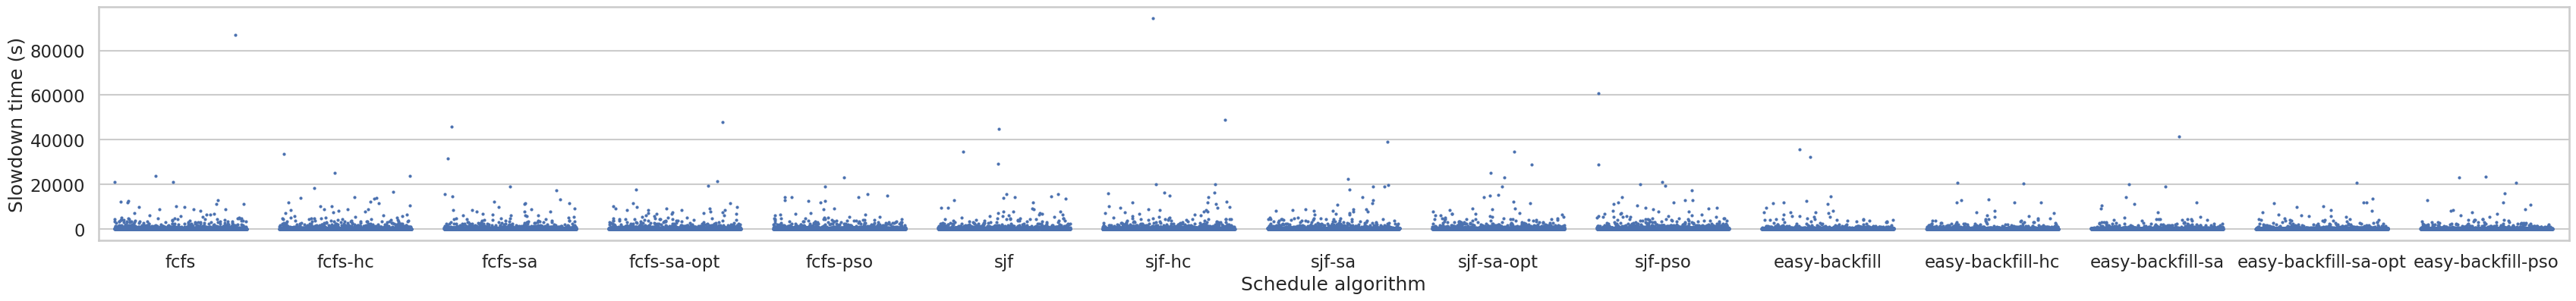

In [94]:
# Scatterplot, outliers
largest = pd.concat([metrics_df[metrics_df.schedule == schedule][['schedule', 'slowdown']].nlargest(n=4000, columns='slowdown') for schedule in schedule_names])
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(42,4))
    sns.stripplot(data=largest, x='schedule', y='slowdown', ax=ax, size=3, jitter=0.4)
    ax.set_ylabel('Slowdown time (s)')
    ax.set_xlabel('Schedule algorithm')
fig.savefig('results/slowdown_dist.pdf', bbox_inches='tight')

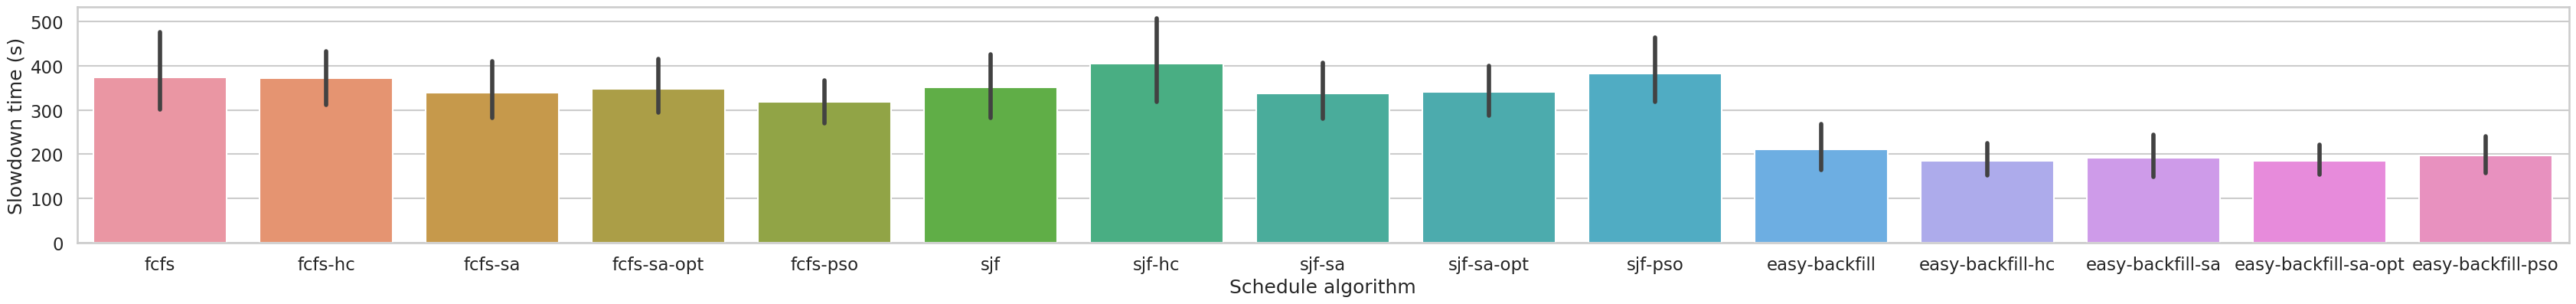

In [95]:
# Mean, logscale
fig, ax = plt.subplots(figsize=(42,4))
sns.barplot(data=slowdown, ax=ax)
ax.set_ylabel('Slowdown time (s)')
ax.set_xlabel('Schedule algorithm')
fig.savefig('results/slowdown_mean.pdf', bbox_inches='tight')

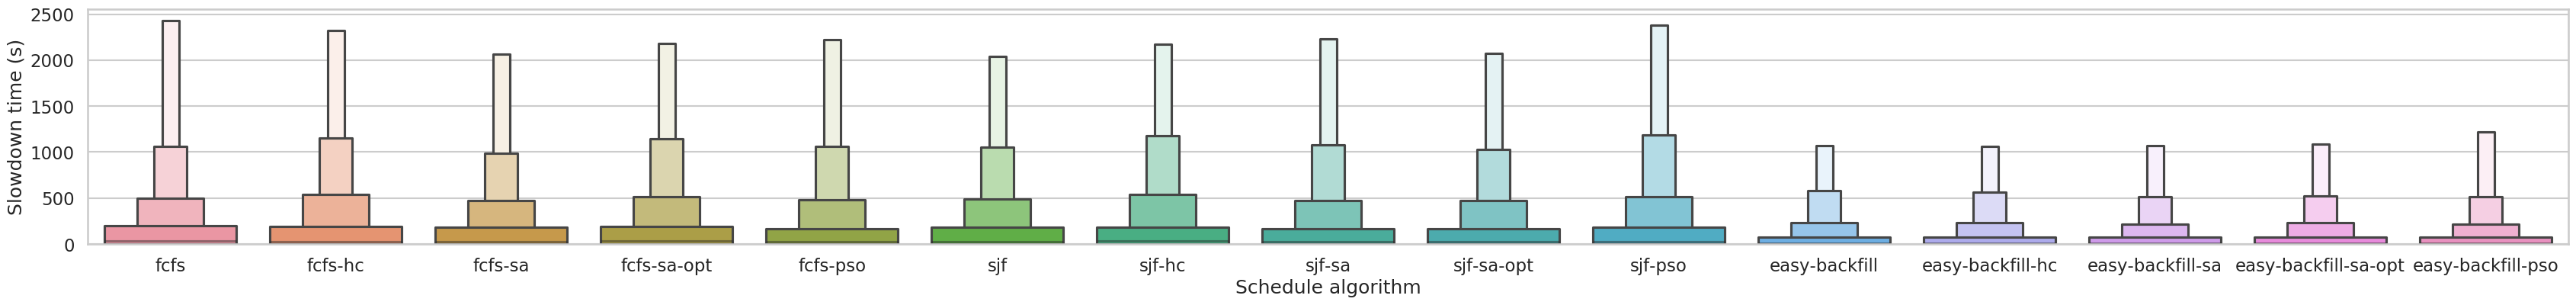

In [98]:
fig, ax = plt.subplots(figsize=(42,4))
sns.boxenplot(data=slowdown, k_depth=4, showfliers=False, ax=ax)
ax.set_ylim(0)
# ax.set_ylim(top=140000)
ax.set_ylabel('Slowdown time (s)')
ax.set_xlabel('Schedule algorithm')
fig.savefig('results/slowdown_boxen.pdf', bbox_inches='tight')

fcfs: 0.02584597244321113
fcfs-hc: 0.025844760808260814
fcfs-sa: 0.025880123013920397
fcfs-sa-opt: 0.025895118642453408
fcfs-pso: 0.02578515917494846
sjf: 0.025768048040296497
sjf-hc: 0.025830719501239434
sjf-sa: 0.025796877057752805
sjf-sa-opt: 0.02576403260964069
sjf-pso: 0.025821065963205617
easy-backfill: 0.025744178907881176
easy-backfill-hc: 0.025796100319587296
easy-backfill-sa: 0.025793727342533785
easy-backfill-sa-opt: 0.025808340841035983
easy-backfill-pso: 0.025785704509329977


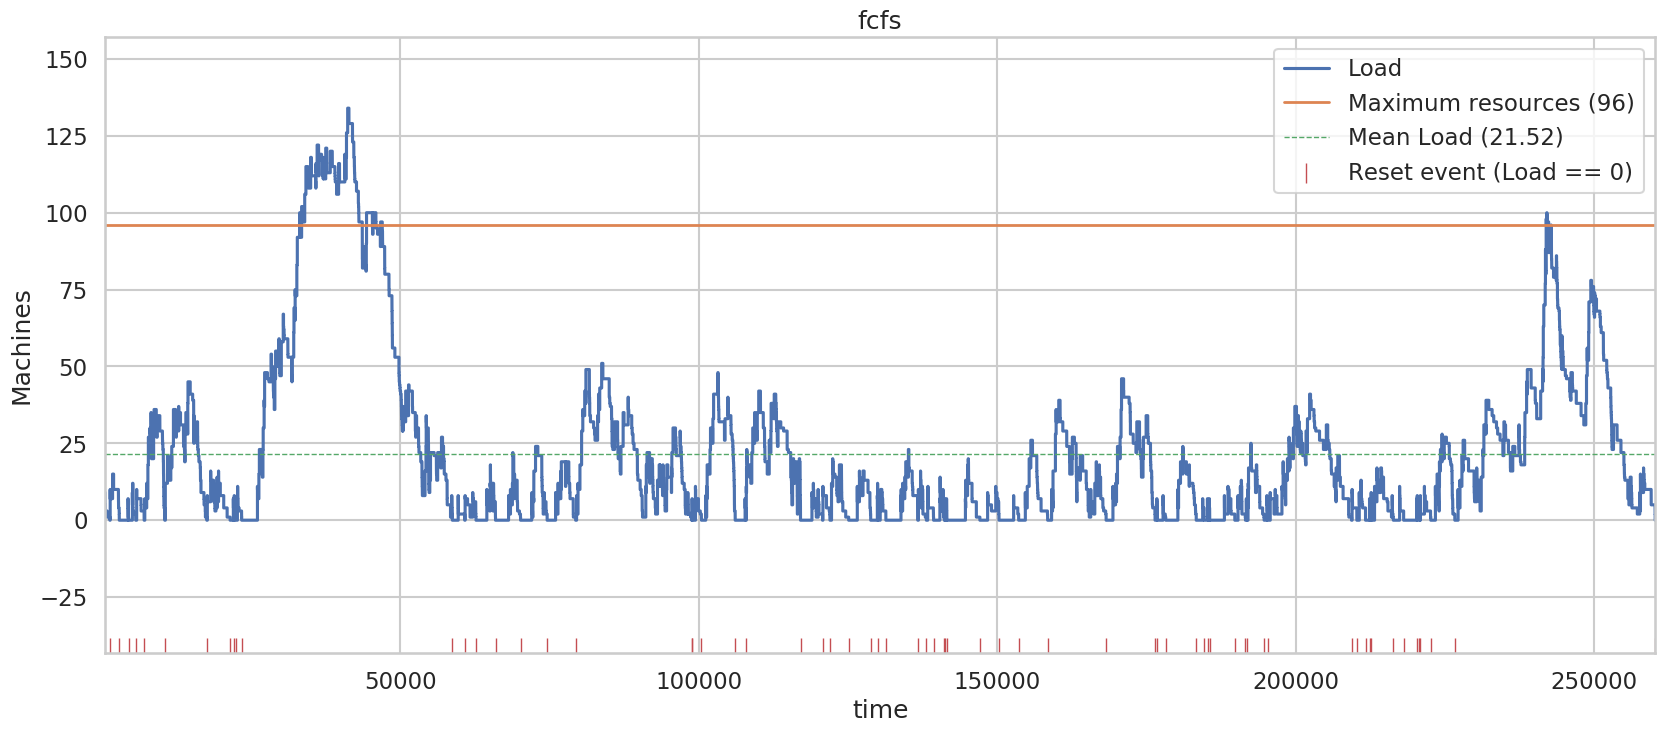

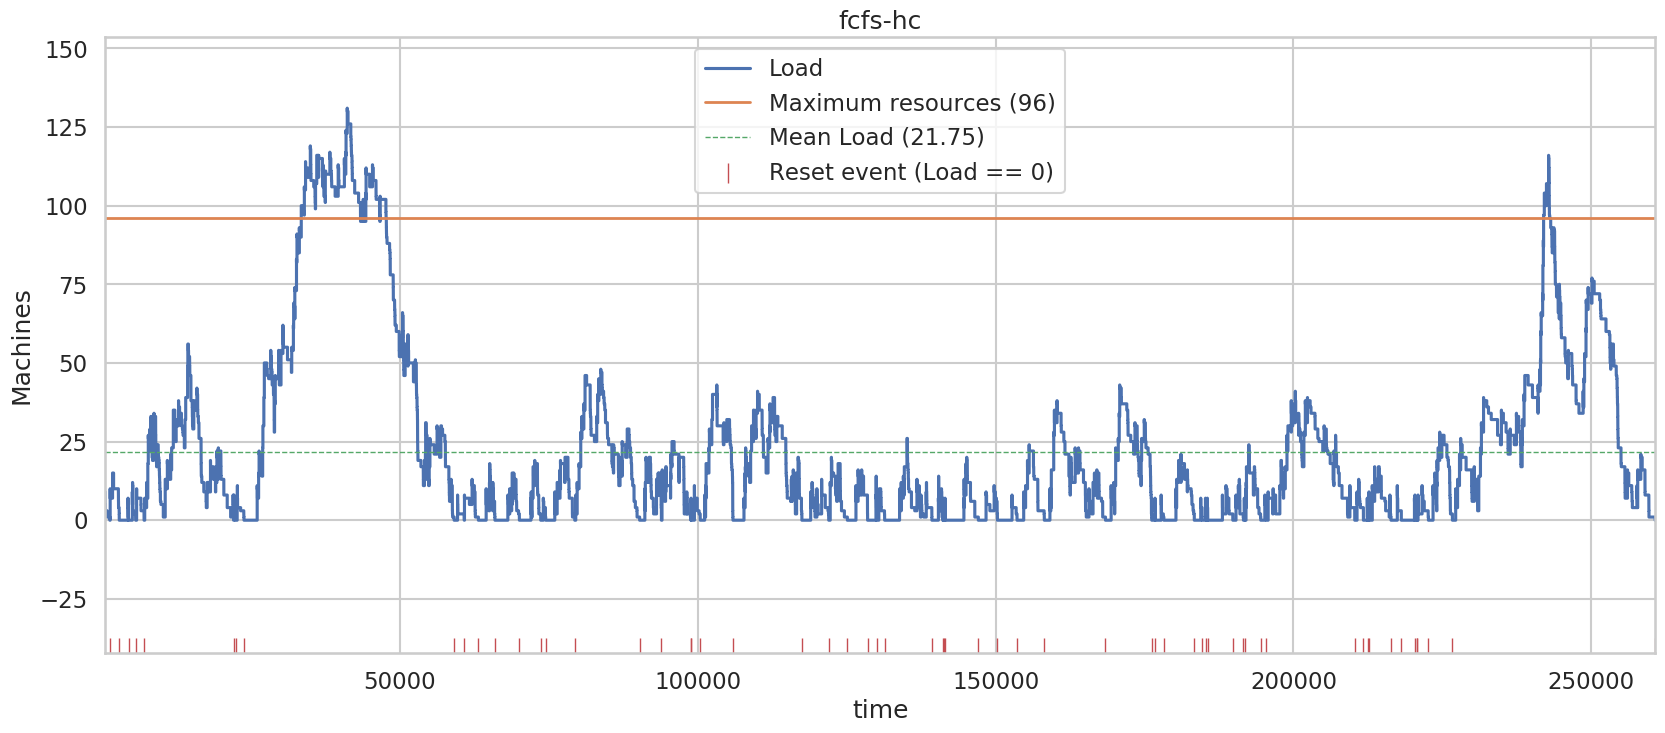

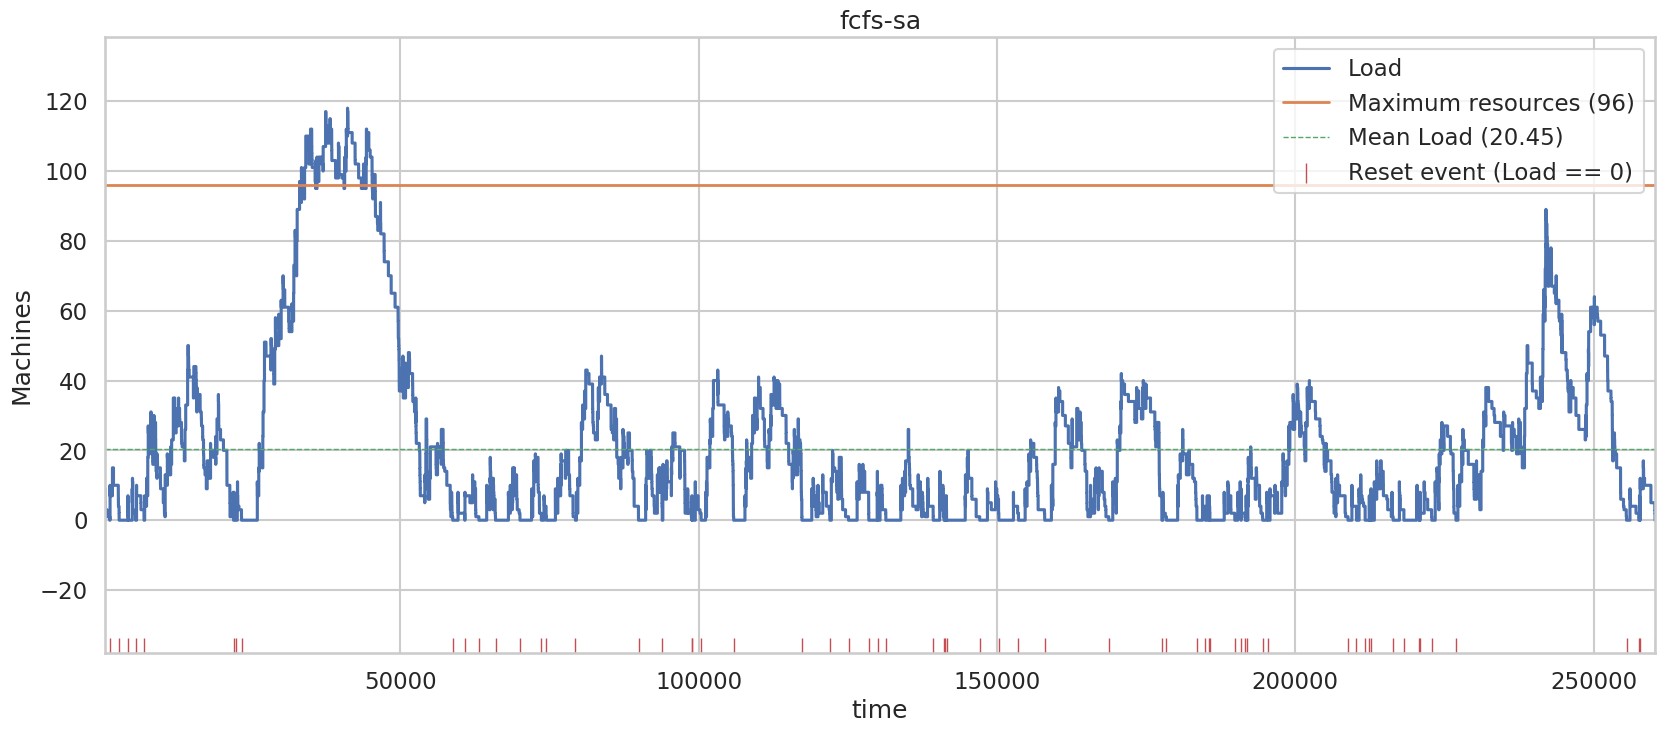

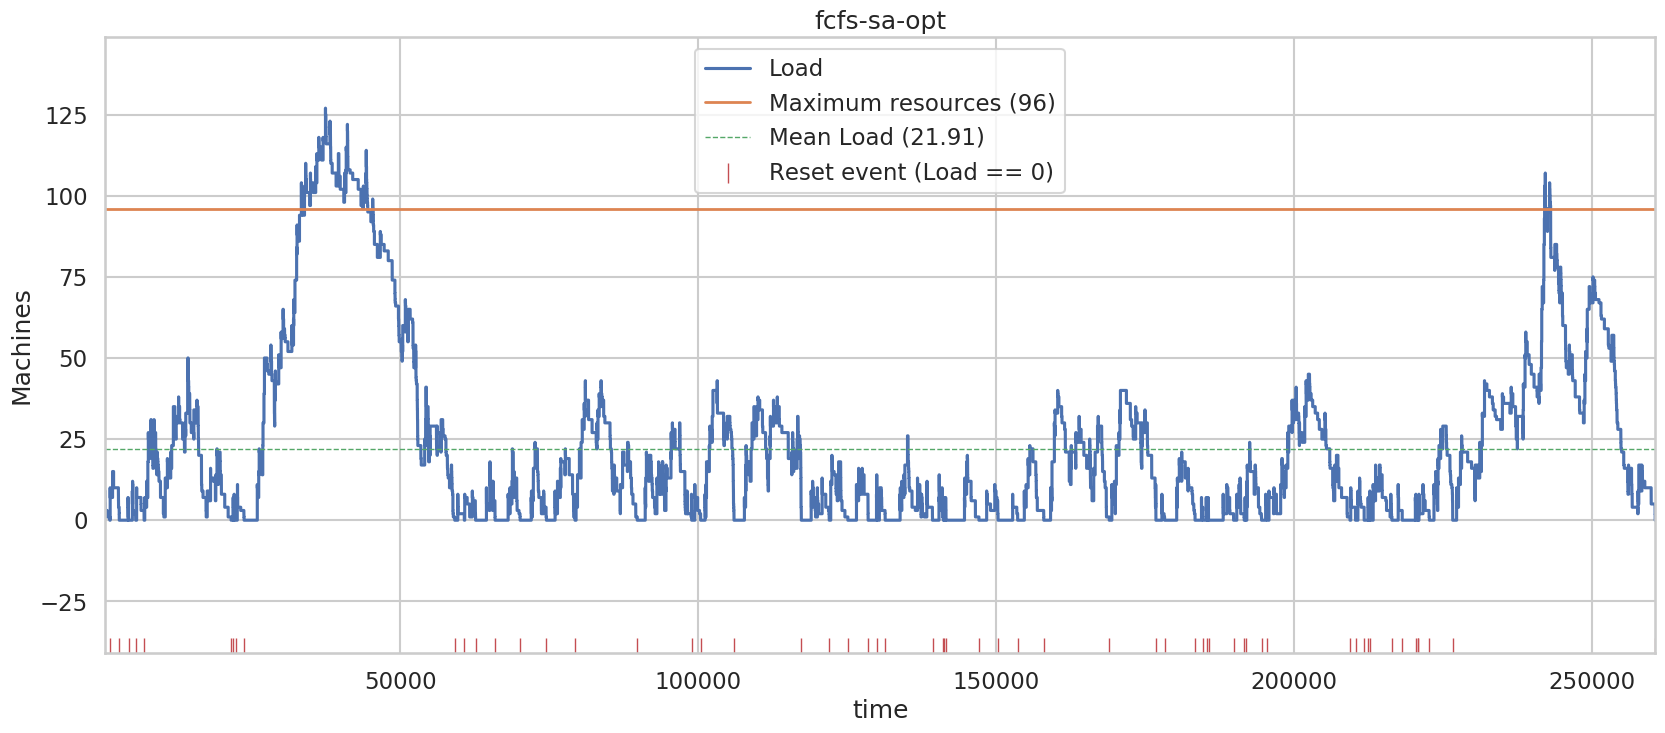

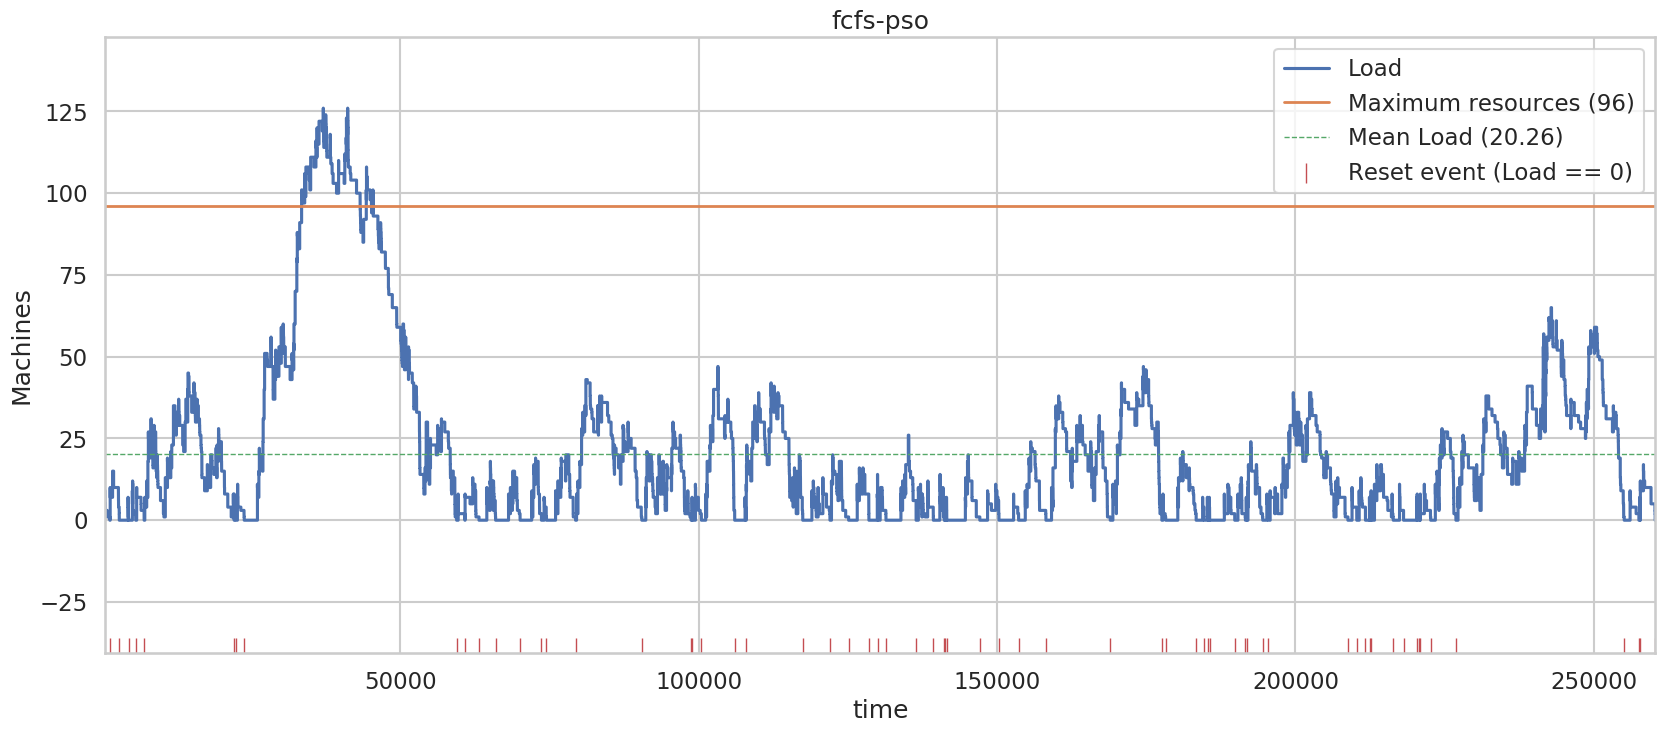

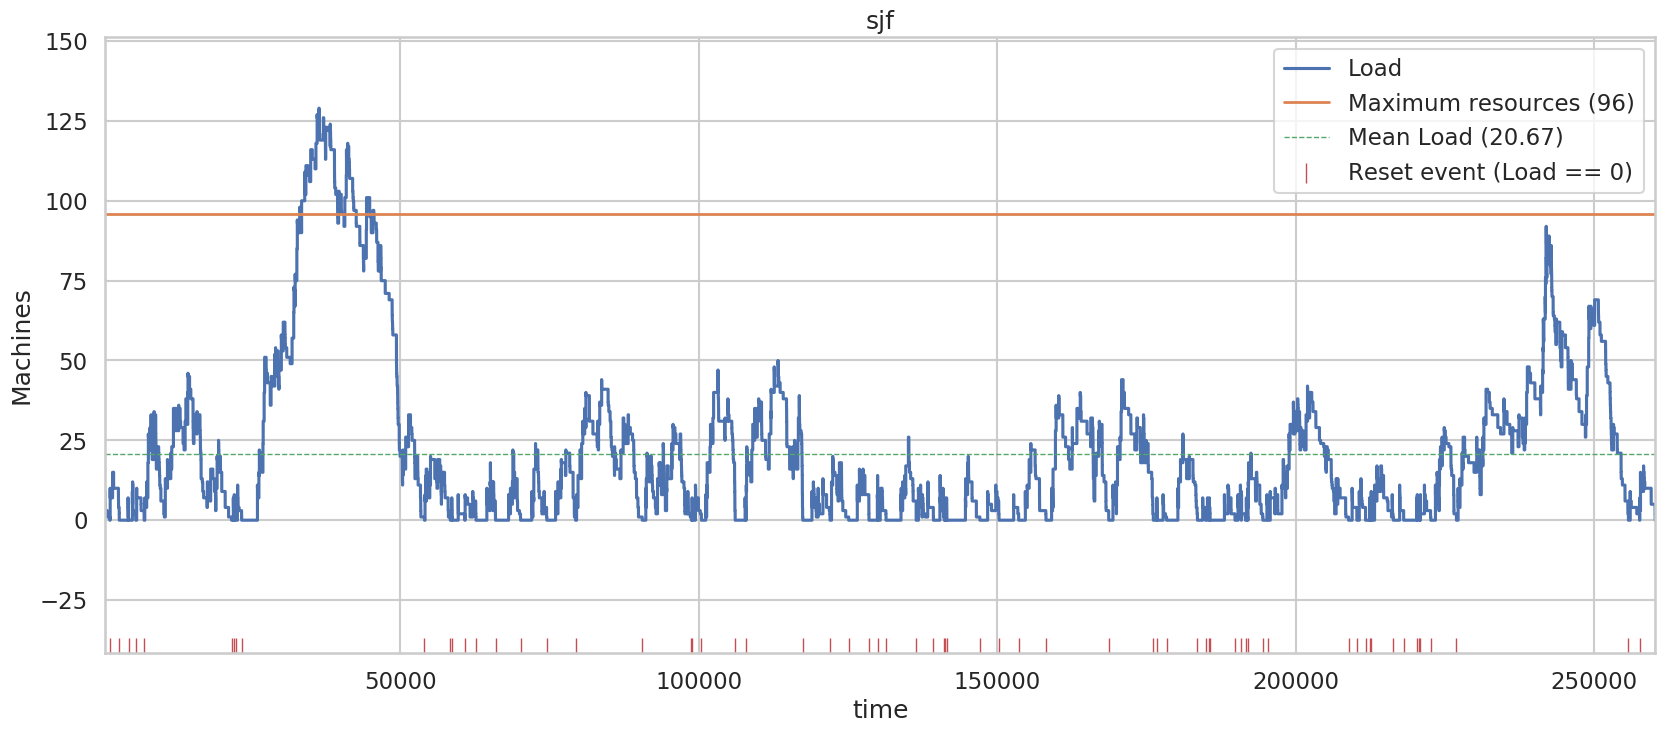

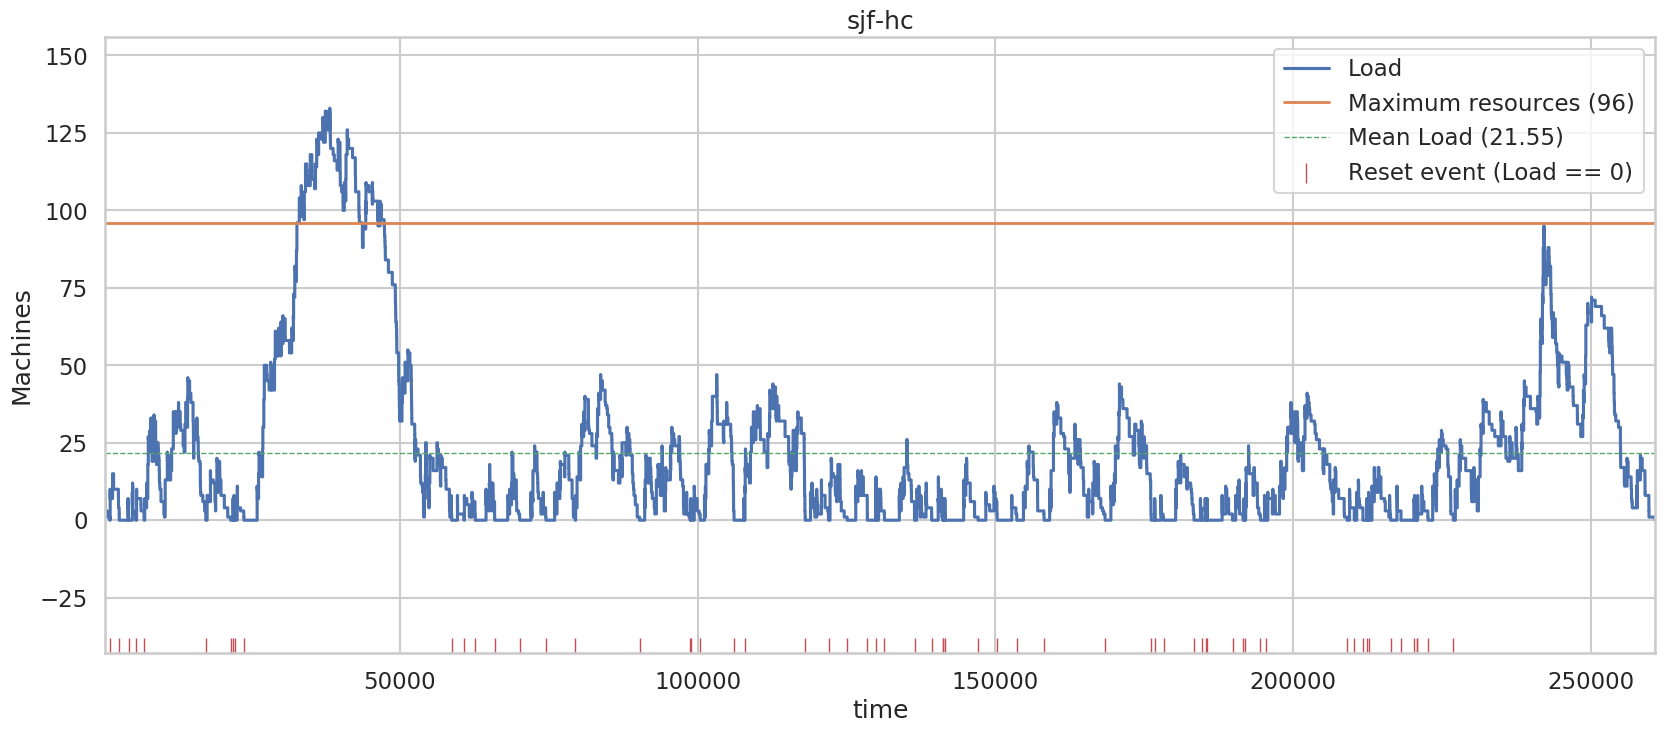

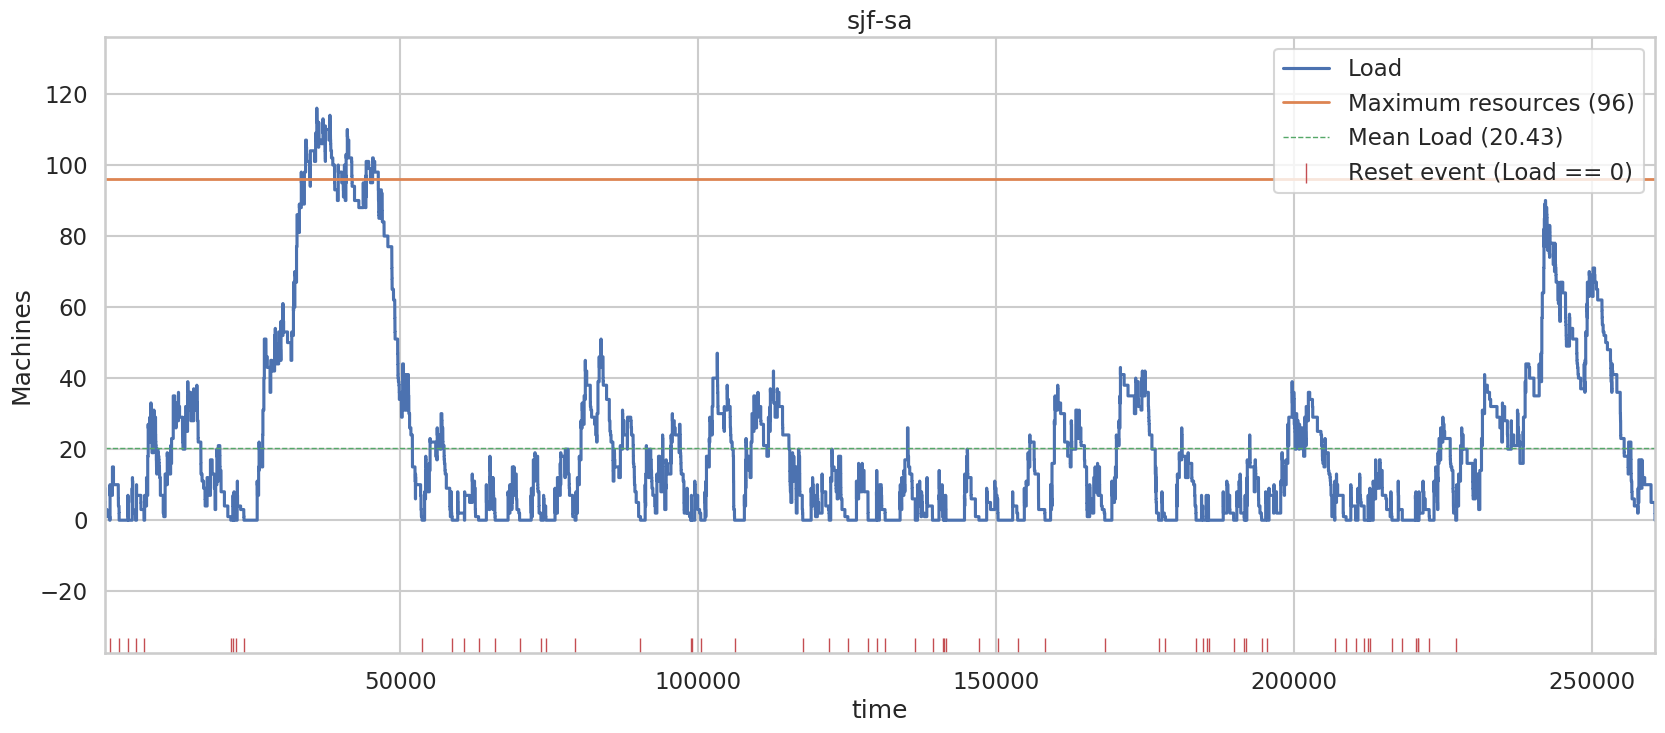

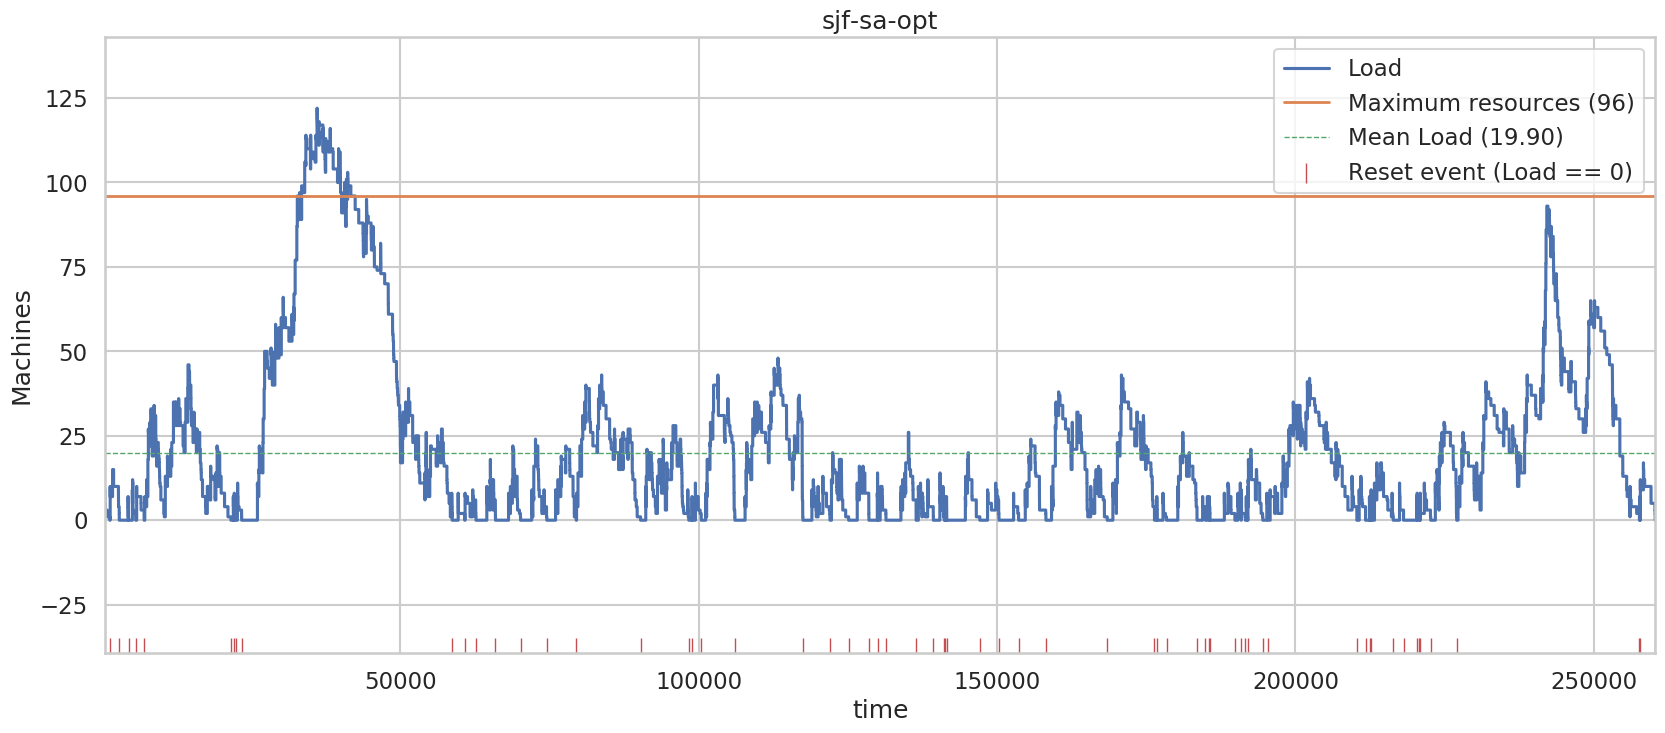

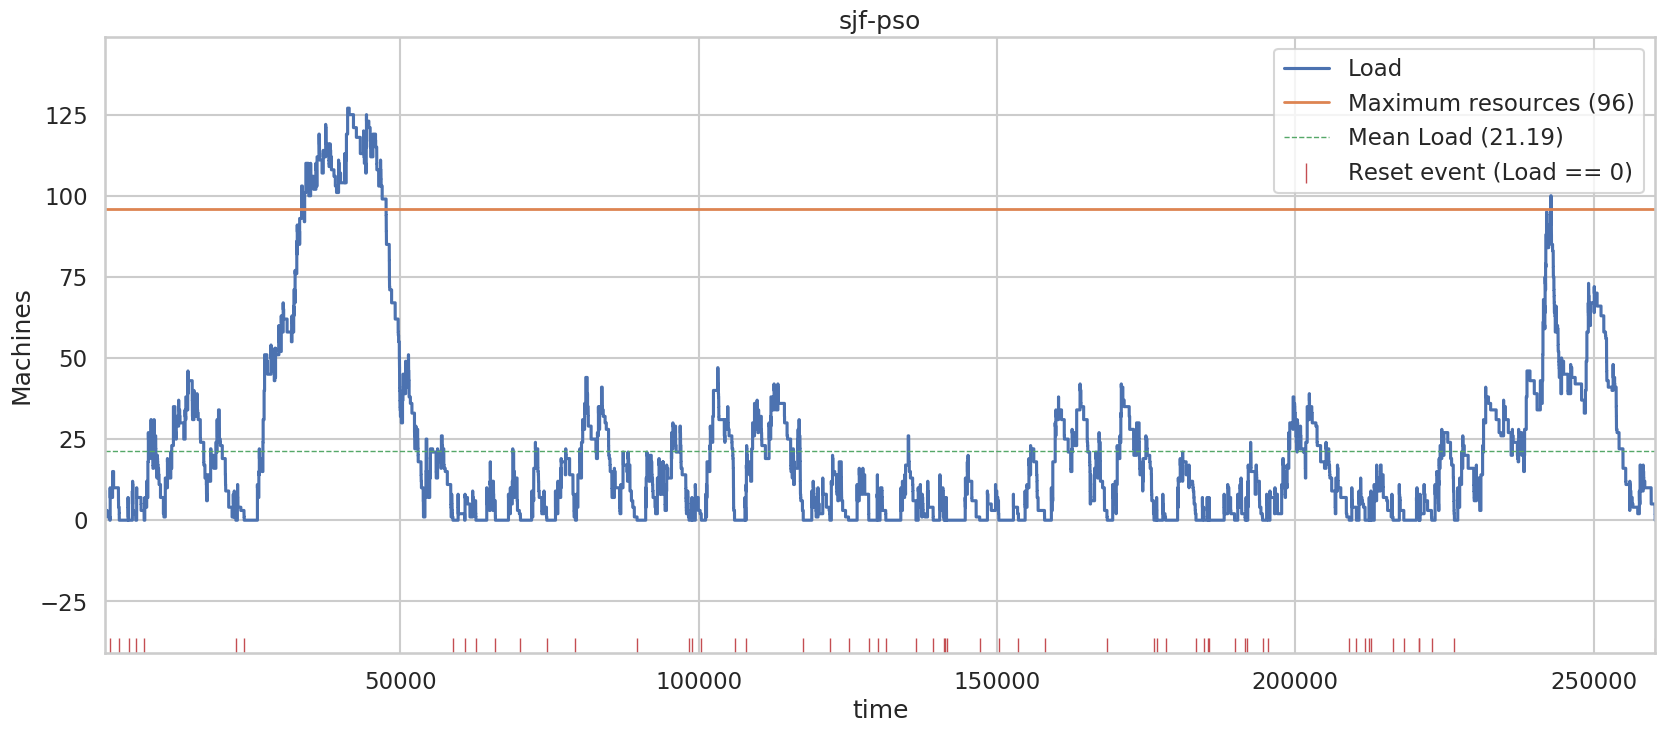

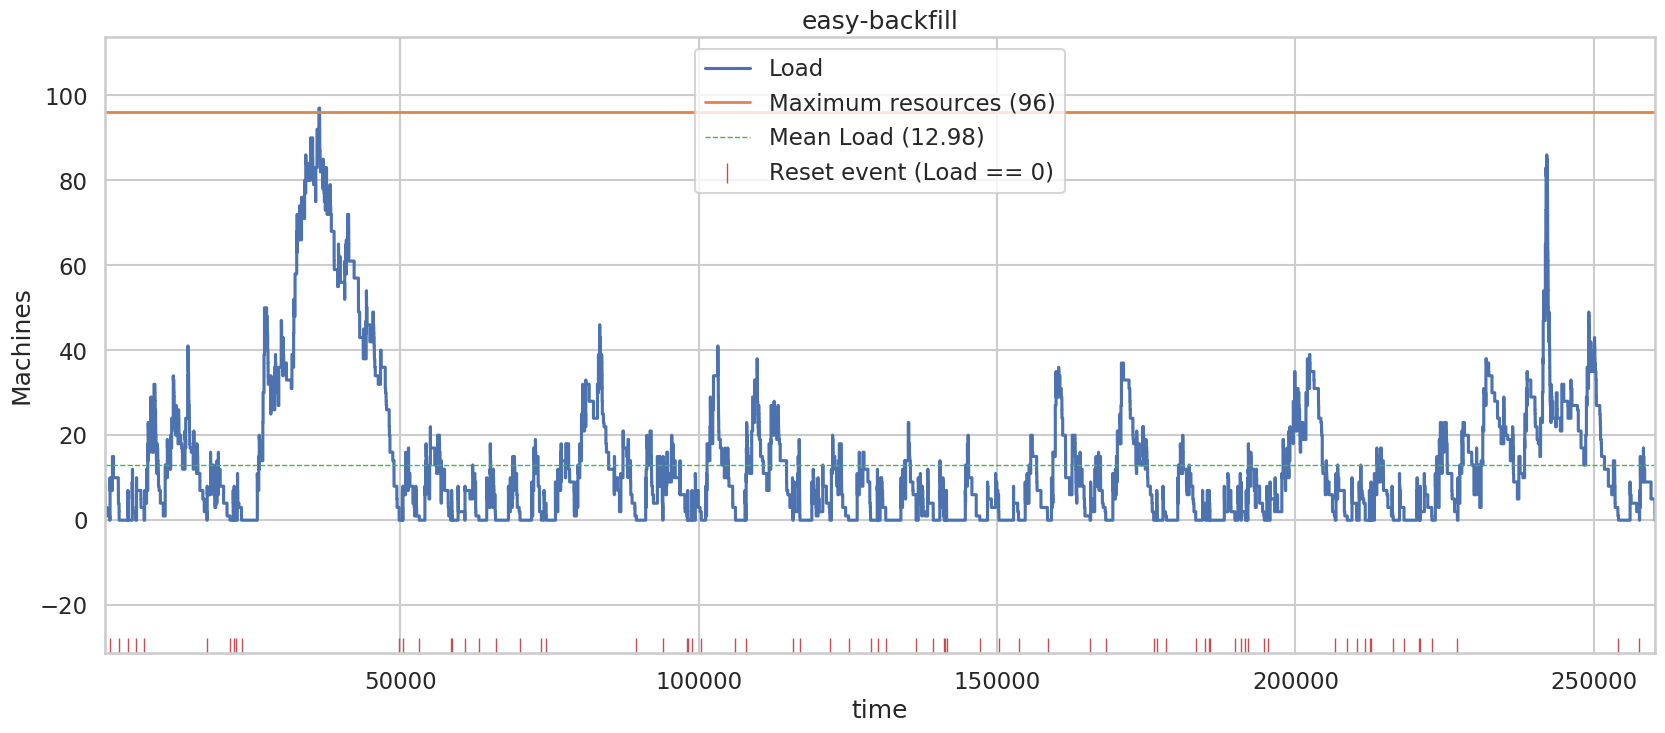

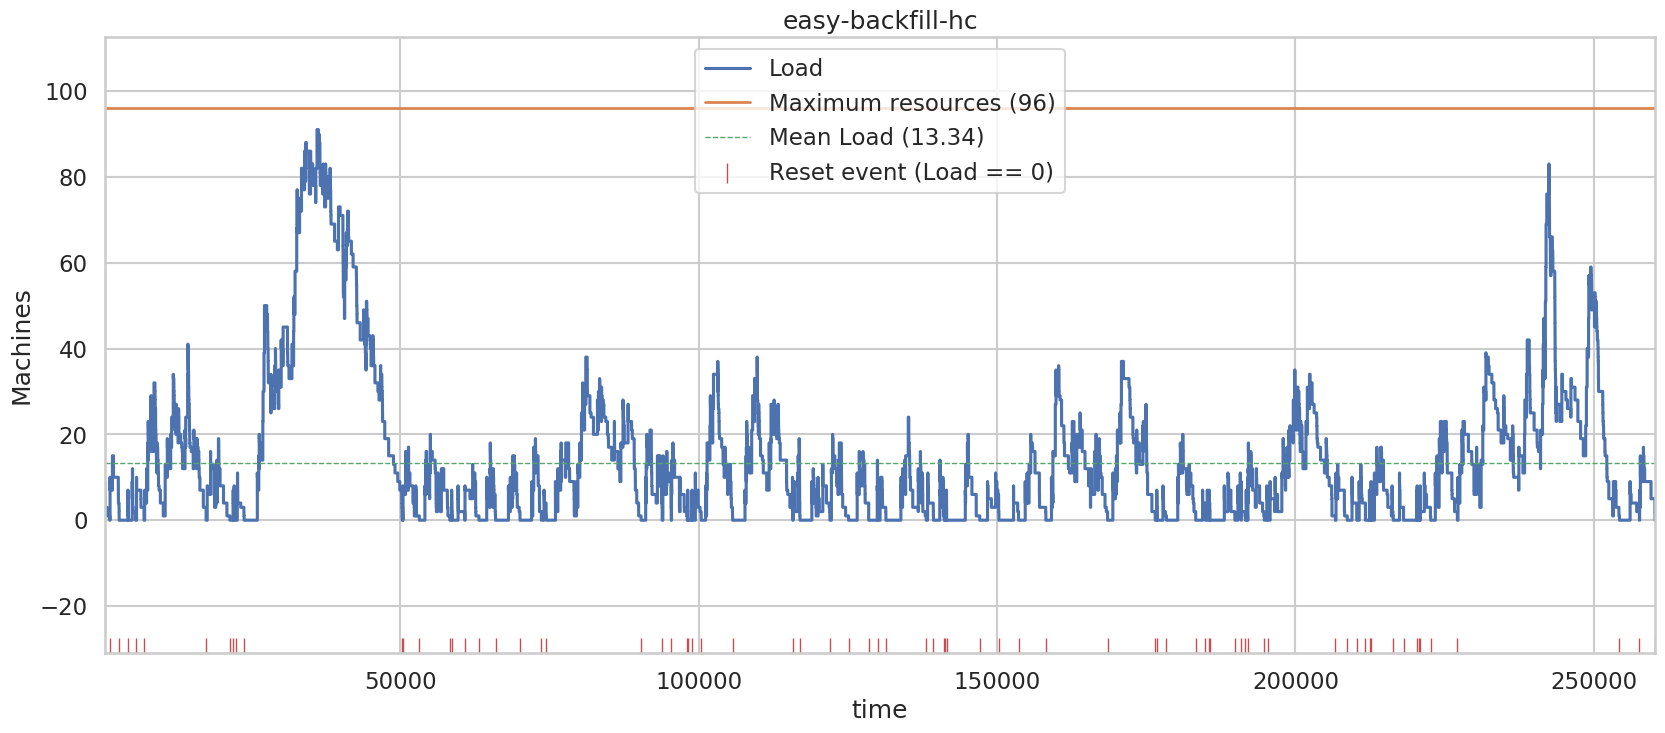

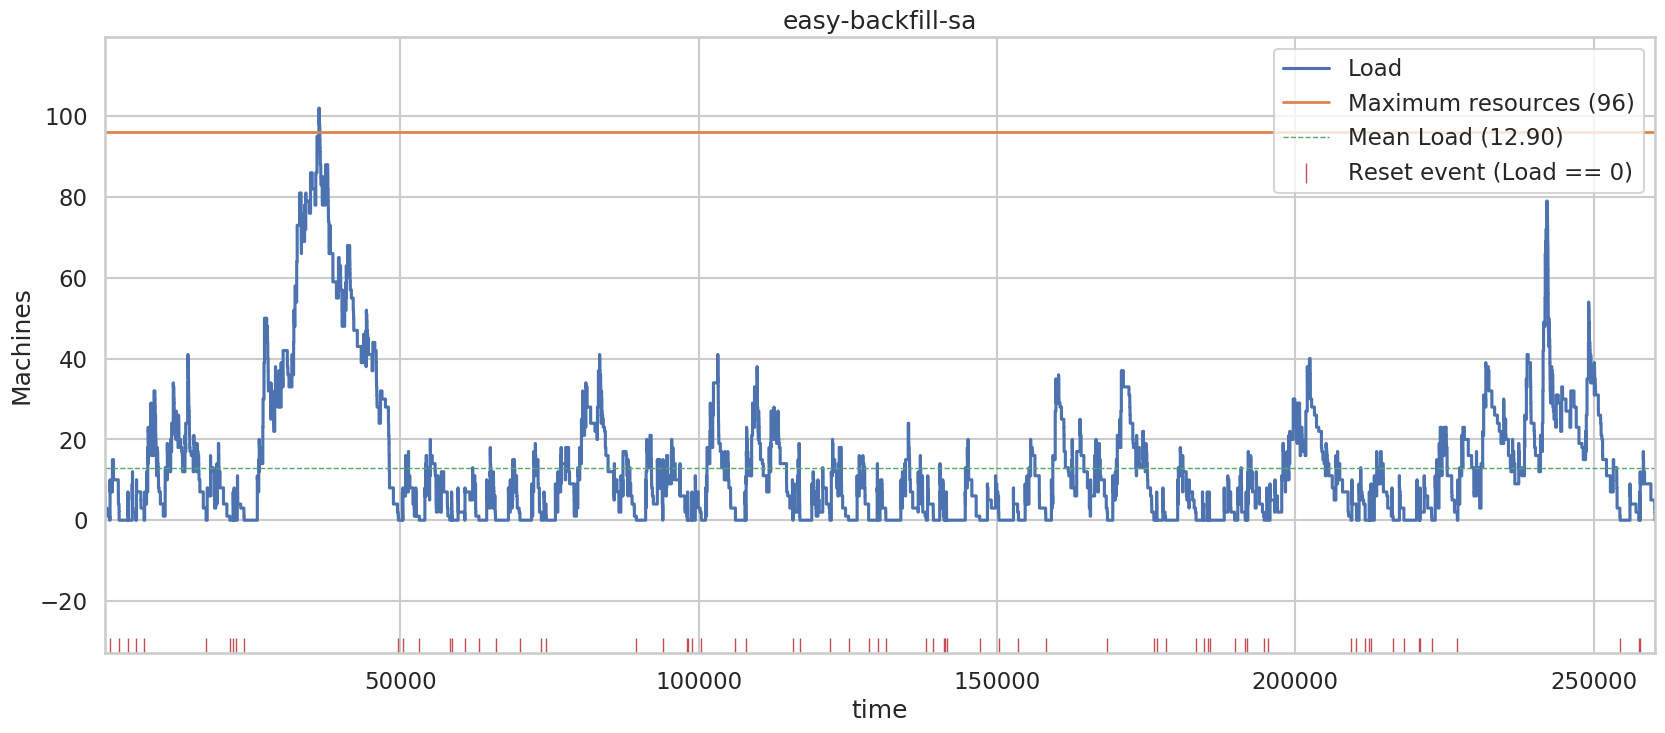

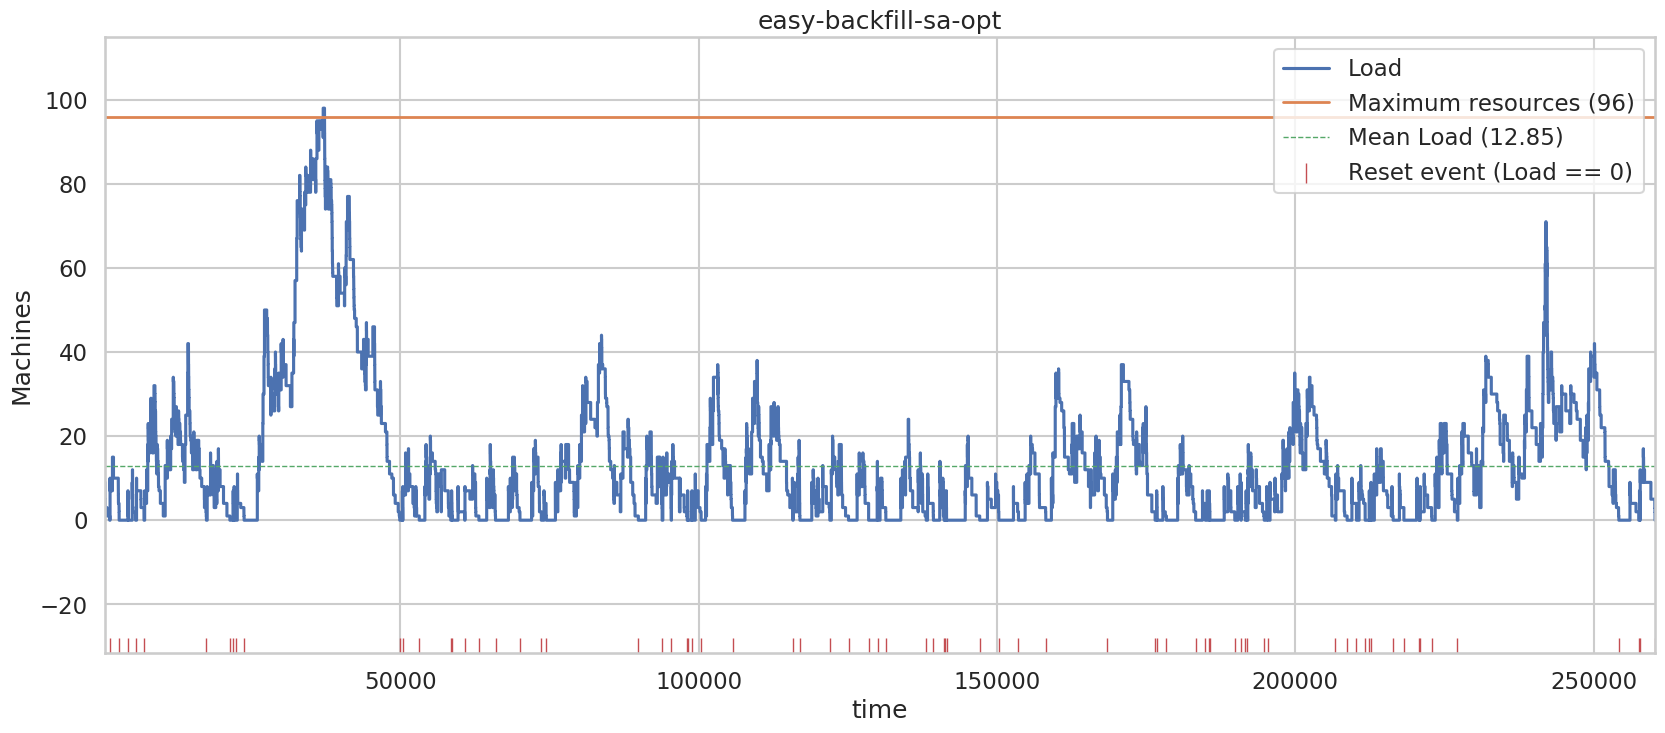

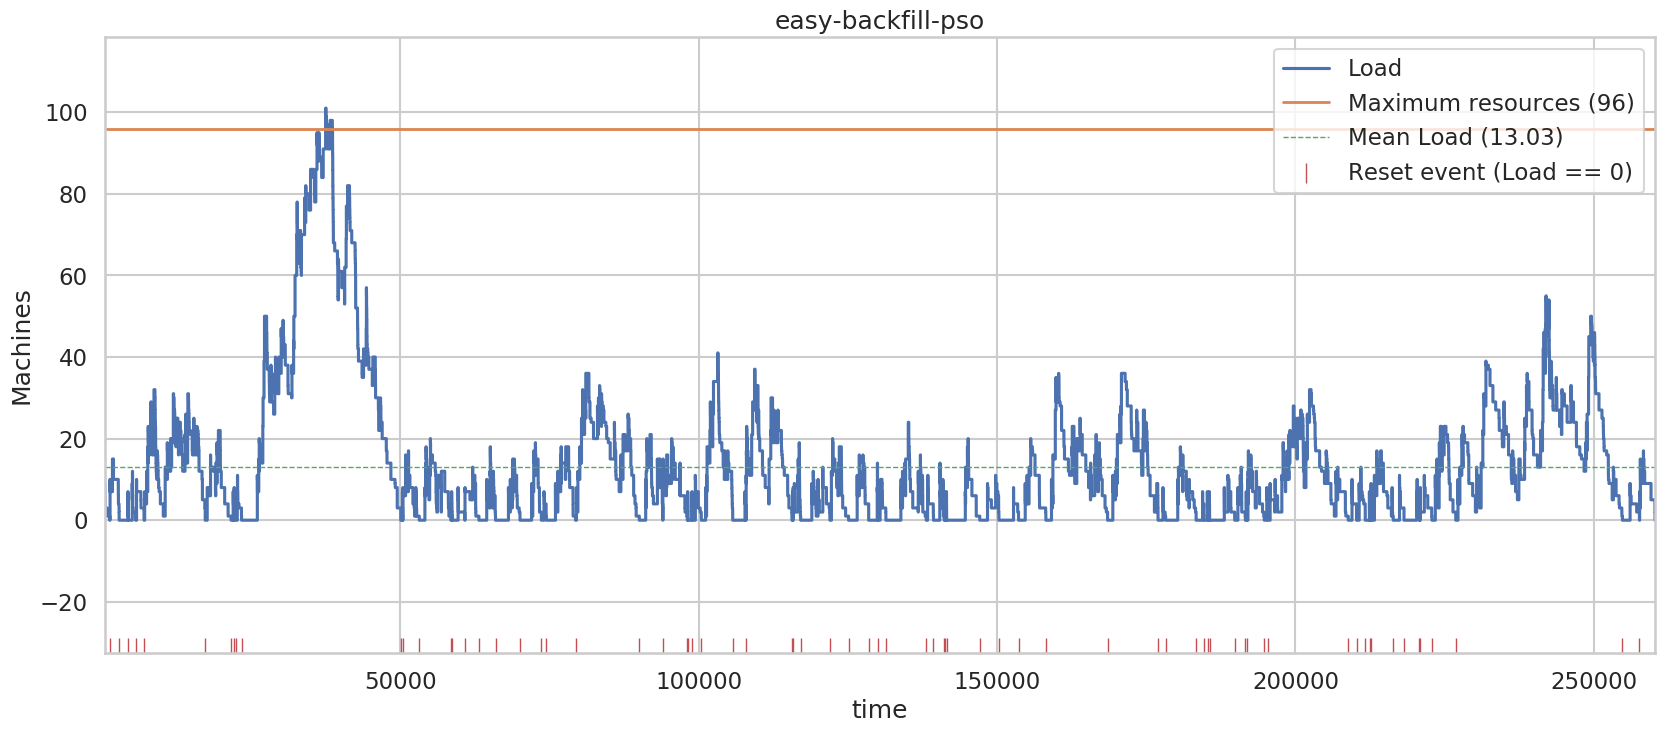

In [99]:
for schedule in schedule_names:
    print(f"{schedule}: {metrics.loc[schedule].compute_utilisation}")
    fig, ax = plt.subplots(figsize=(20,8))
    ax.set_title(schedule)
    evalys.visu.legacy.plot_load(jobsets[schedule].queue, nb_resources=96, ax=ax)

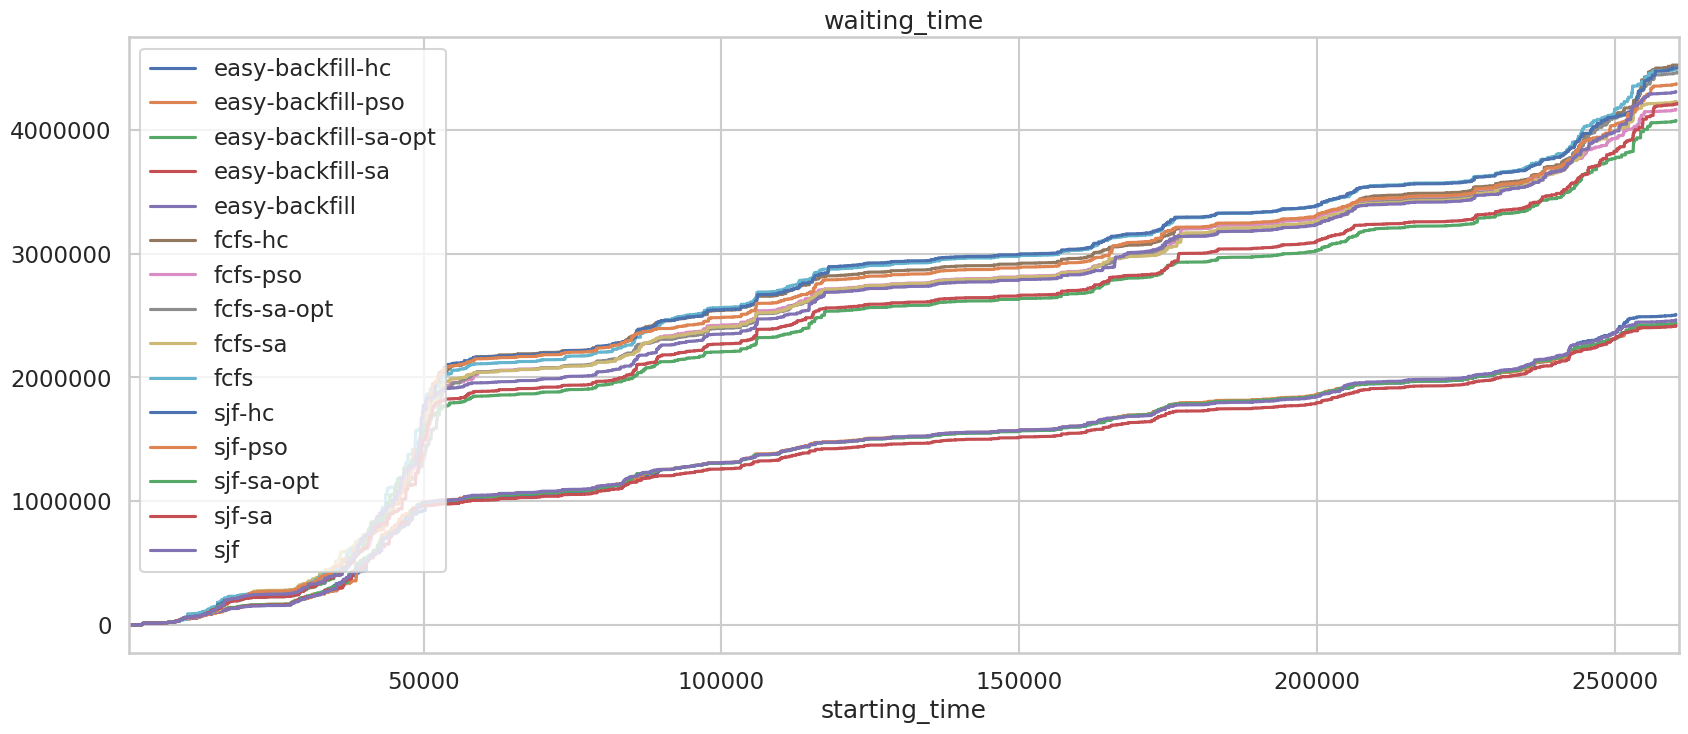

In [100]:
fig, ax = plt.subplots(figsize=(20,8))
evalys.visu.legacy.plot_series('waiting_time', jobsets)